# POWER PLANT PROJECT[TARGET:PRIMARY FUEL]

LOAD WANTED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

# CHECKING DATA ROWS AND COLUMNS

In [2]:
df=pd.read_csv("powerplant.csv")

In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [5]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.59665,865.4,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


object columns are absent will check it afterwards

In [7]:
df.shape

(908, 25)

dataset consist of 908 rows and 25 columns

In [8]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

THERE ARE 25 DIFFERENT COLUMNS ARE IN THE DATA,,country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
'other_fuel2',
'other_fuel3', 'commissioning_year', 'owner', 'source', 'url','geolocation_source', 'wepp_id', 
'year_of_capacity_data','generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 
'generation_gwh_2017', 'generation_data_source','estimated_generation_gwh'are the different columns in the dataseet

In [9]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [10]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

THE NULL PRESENCE IS VERY HIGH IN THE DATA MOST OF THE COLUMNS HAS NULL VARIABLES AND SOME HAS 100% NULL.we will treat this null variables later

<AxesSubplot:>

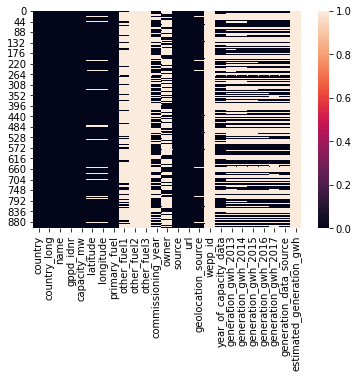

In [11]:
sns.heatmap(df.isnull())

the figure conveys the high presence of null value in the dataset.we treat it afterwards


# EDA

ANALYSING OUR TARGET FIRST:primary_fuel

In [12]:
df['primary_fuel']

0      Solar
1       Coal
2       Wind
3        Gas
4       Coal
       ...  
903     Coal
904    Solar
905     Wind
906     Coal
907     Wind
Name: primary_fuel, Length: 908, dtype: object

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64


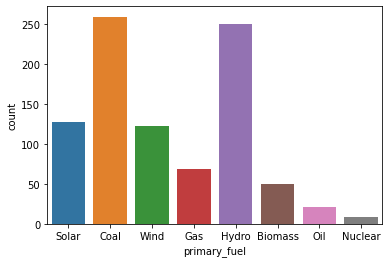

In [13]:
sns.countplot(df['primary_fuel'])
print(df["primary_fuel"].value_counts())

THERE ARE 8 VARIOUS CATEGORIES OF FUELS THOSE ARE IN UNBALANCED FORMAT Coal=259,Hydro=250,Solar=127,Wind=123,,
Gas=69,,Biomass=50,Oil=21,,Nuclear=9

WE WANT TO BALANCE THIS TARGET DATA

# FEATURE COLUMNS:UNIVARIATE ANALYSIS

# COUNTB PLOTS

IND    908
Name: country, dtype: int64


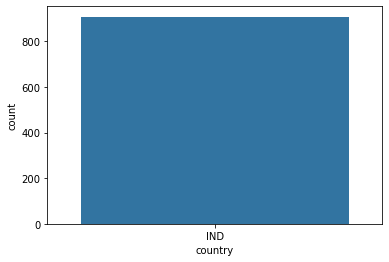

In [14]:
sns.countplot(df['country'])
print(df["country"].value_counts())

country IS A SINGLE VALUED COLUMN INDIA IS THE ONLY COUNTRY ANALYSING HERE

India    908
Name: country_long, dtype: int64


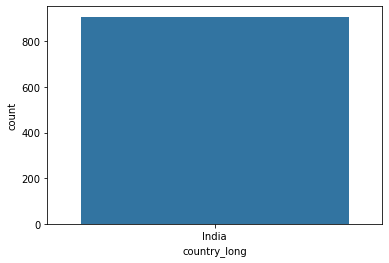

In [15]:
sns.countplot(df['country_long'])
print(df["country_long"].value_counts())

IND=India,the clear country term is explaining here

Torrent Gujurat Wind Farm                 1
MIHAN TPP                                 1
KUTHUNGAL                                 1
CHAMERA II                                1
Khetusar - Suryauday Solar Power Plant    1
                                         ..
CHENANI I to III                          1
KODAYAR-I&II                              1
NIMBAHERA JK CEMENT                       1
R_GUNDEM - B                              1
DHAKRANI                                  1
Name: name, Length: 908, dtype: int64


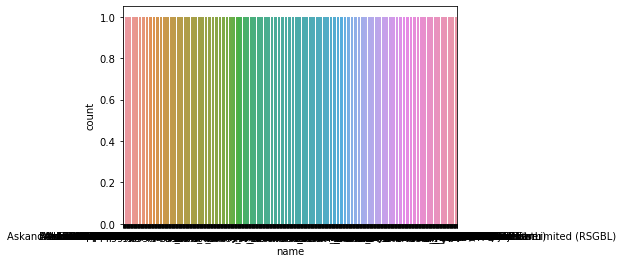

In [16]:
sns.countplot(df['name'])
print(df["name"].value_counts())

analysing 908 different power plants in india,all have single count

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


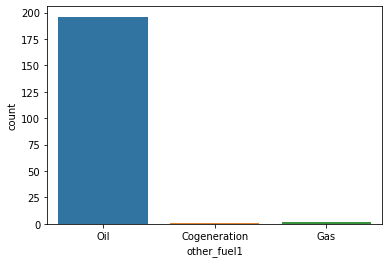

In [17]:
sns.countplot(df['other_fuel1'])
print(df["other_fuel1"].value_counts())

only some plants are using other fuels,most of the plants using oil, only 2 using gas and single plant using cogeneration

Oil    1
Name: other_fuel2, dtype: int64


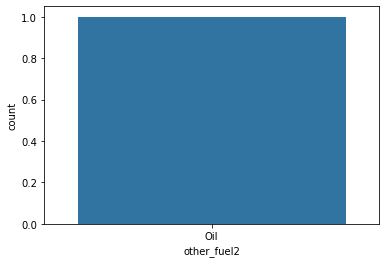

In [18]:
sns.countplot(df['other_fuel2'])
print(df["other_fuel2"].value_counts())

only one plant using oil as secondary for other fuel

Jk Cement ltd                               4
Acc Acc ltd                                 4
Sterling Agro Industries ltd.               4
Karnataka Power Corporation Limited         3
Jaypee Ltd jccl)                            3
                                           ..
UPL                                         1
Sanjeev Prakashan                           1
Northwest Energy Private Limited (NWEPL)    1
Shri Malaprabha ssk                         1
Dhariwal Pvt ltd                            1
Name: owner, Length: 280, dtype: int64


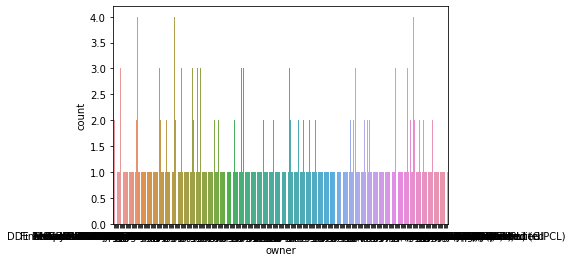

In [19]:
sns.countplot(df['owner'])
print(df["owner"].value_counts())

some owners like ACC LTD,JK CEMENT,MAHAGENCO,STERLING AGRO ETC HAS MULTIPLE PLANTS

Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Technocraft Technocraft group                  1
Power Private edM/Pdf                          1
Moser Baer Solar Limited (MBSL)                1
Hare Pvt ltd                                   1
S J Green Park Energy Private Limited          1
Name: source, Length: 191, dtype: int64


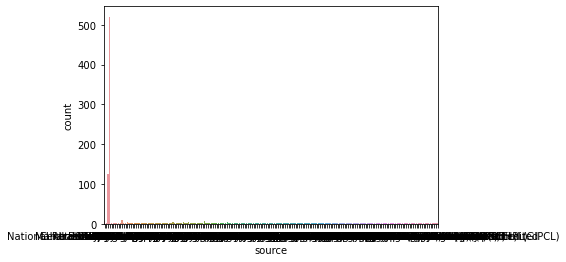

In [20]:
sns.countplot(df['source'])
print(df["source"].value_counts())

CENTRAL ELECTRICITY AUTHORITY IS THE MAIN SOURCE OF PLANTS,CDM ALSO HAVE LARGE PARTICIPATION ,HOWEVER OTHER COMPANIES HAVE A LITTLE PARTICIPATION

http://www.cea.nic.in/                                                                                                520
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                                                         7
http://www.ntpc.co.in                                                                                                   6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf                                        5
http://energy.rajasthan.gov.in/content/dam/raj/energy/common/Details%20of%20commissioned%20Solar%20Projects%20.pdf      4
                                                                                                                     ... 
https://cdm.unfccc.int/Projects/DB/RWTUV1411994965.49/view                                                              1
http://www.konarkgroup.co.in                                                                                            1
https://cdm.unfccc.int/P

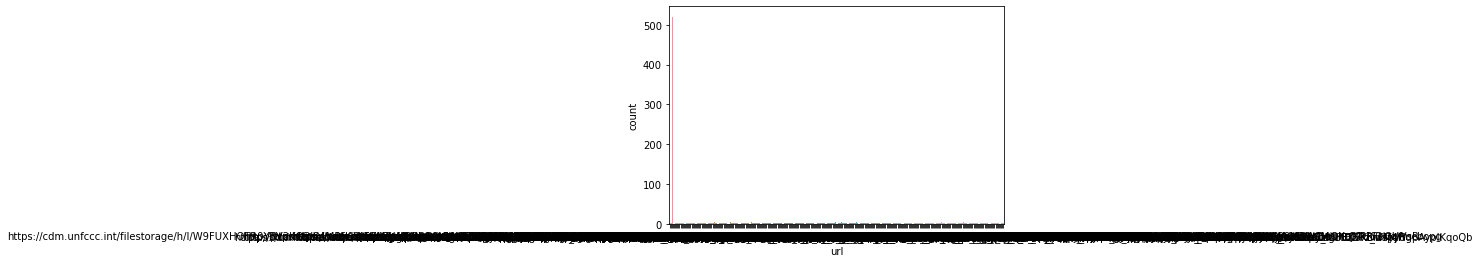

In [21]:
sns.countplot(df['url'])
print(df["url"].value_counts())

IT GIVES THE URL OF EVERY SOURCE,CENTRAL ELECTRICITY AUTHORITY HAVE HIGH COUNTS

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


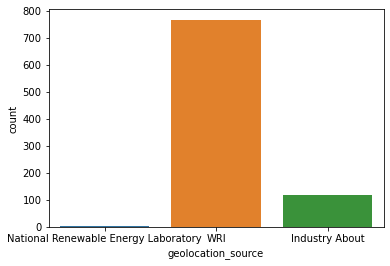

In [22]:
sns.countplot(df['geolocation_source'])
print(df["geolocation_source"].value_counts())

ONLY THREE GEOLOCATION SOURCES ARE THERE WRI,NREL,,INDUSTRY ABOUT ARE THOSE

Central Electricity Authority    450
Name: generation_data_source, dtype: int64


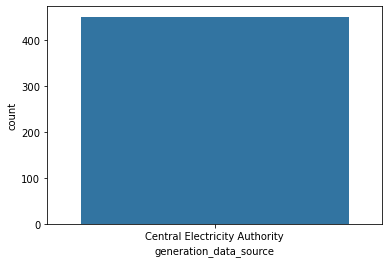

In [23]:
sns.countplot(df['generation_data_source'])
print(df["generation_data_source"].value_counts())

generation_data_source is only central electricity authority

# DISTRIBUTION PLOT

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

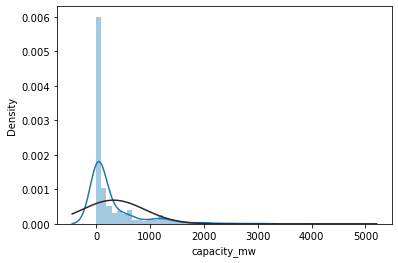

In [24]:
sns.distplot(df['capacity_mw'],fit=norm)

the plot of capacity_mw is not distributed normally,skewness is clearley present in capacity_mw

<AxesSubplot:xlabel='latitude', ylabel='Density'>

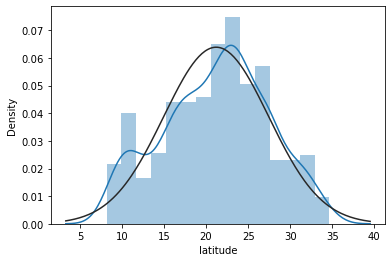

In [25]:
sns.distplot(df['latitude'],fit=norm)

latitude almost normally distributed,it is clear from the plot

<AxesSubplot:xlabel='longitude', ylabel='Density'>

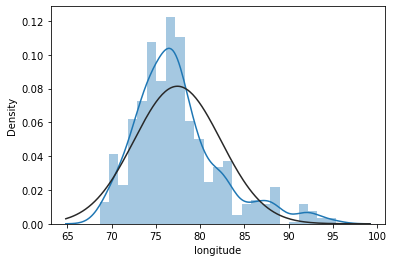

In [26]:
sns.distplot(df['longitude'],fit=norm)

longitude also distributed normally

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

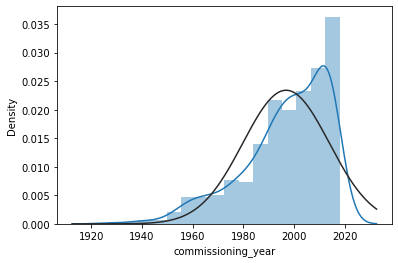

In [29]:
sns.distplot(df['commissioning_year'],fit=norm)

skewness is present in the commissioning_year data,positive skewness is conveying the dist plot

<AxesSubplot:xlabel='year_of_capacity_data', ylabel='Density'>

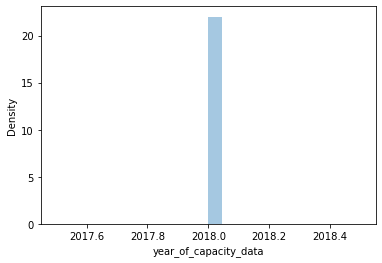

In [30]:
sns.distplot(df['year_of_capacity_data'],fit=norm)

single valued column,

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Density'>

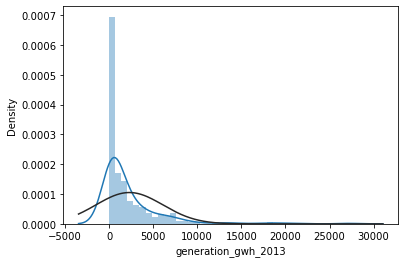

In [31]:
sns.distplot(df['generation_gwh_2013'],fit=norm)

generation_gwh_2013 have clear negative skewness presence

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

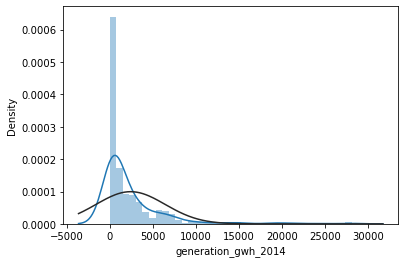

In [32]:
sns.distplot(df['generation_gwh_2014'],fit=norm)

generation_gwh_2014 not distributed norally,negative skewness is there

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

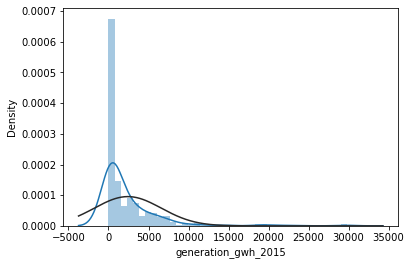

In [33]:
sns.distplot(df['generation_gwh_2015'],fit=norm)

the distribution of generation_gwh_2015 is not ormal,negative skewness is there

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

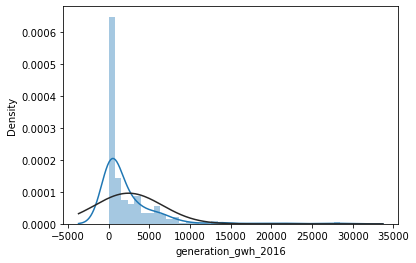

In [34]:
sns.distplot(df['generation_gwh_2016'],fit=norm)

generation_gwh_2016 is not distributed normally, and skewness is there

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

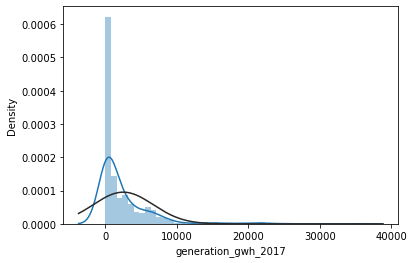

In [35]:
sns.distplot(df['generation_gwh_2017'],fit=norm)

generation_gwh_2017 have negative skewness and not distributed normlly

# bivariate analysis

<AxesSubplot:title={'center':'comparison of CAPACITY AND PRIMARY FUEL '}, xlabel='capacity_mw', ylabel='primary_fuel'>

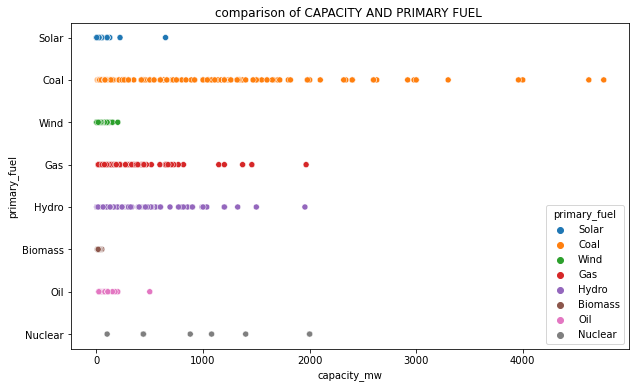

In [36]:
plt.figure(figsize=[10,6])
plt.title('comparison of CAPACITY AND PRIMARY FUEL ')
sns.scatterplot(df['capacity_mw'],df['primary_fuel'],hue=df['primary_fuel'])

FROM THE PLOT IT IS CLEAR THAT BIOMASS FUEL HAS LESS CAPACITY AND COAL IS PERFORMING GOOD,GAS AND HYDRO HAS ALMOST EQUAL CAPACITY

<AxesSubplot:title={'center':'comparison of CAPACITY AND YEAR '}, xlabel='capacity_mw', ylabel='commissioning_year'>

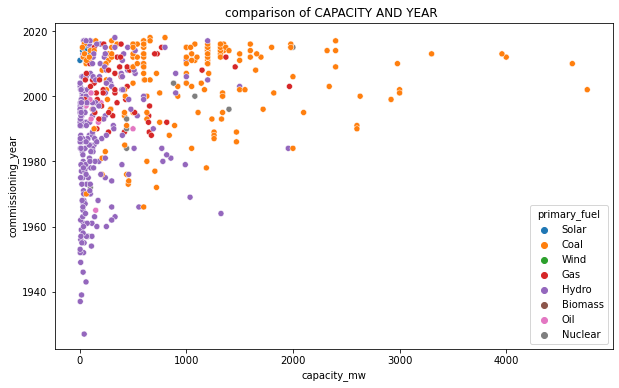

In [37]:
plt.figure(figsize=[10,6])
plt.title('comparison of CAPACITY AND YEAR ')
sns.scatterplot(df['capacity_mw'],df['commissioning_year'],hue=df['primary_fuel'])

IN THE BIGINING TIME THAT IS 1940 S TO 1960S ALL PLANTS ARE HYDRO BUT LATER IT BECOMES COAL WITH HIGH CAPACITY

<AxesSubplot:title={'center':'comparison of CAPACITY AND YEAR OF CAPACITY '}, xlabel='capacity_mw', ylabel='year_of_capacity_data'>

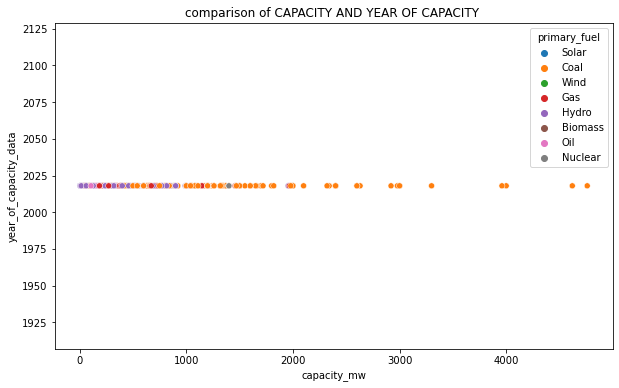

In [38]:
plt.figure(figsize=[10,6])
plt.title('comparison of CAPACITY AND YEAR OF CAPACITY ')
sns.scatterplot(df['capacity_mw'],df['year_of_capacity_data'],hue=df['primary_fuel'])

YEAR IS A SINGLE VALUED DATA, THE CAPACITY IS HIGH FOR COAL PLANTS

<AxesSubplot:title={'center':'comparison of CAPACITY AND PRIMARY SOURCE '}, xlabel='capacity_mw', ylabel='source'>

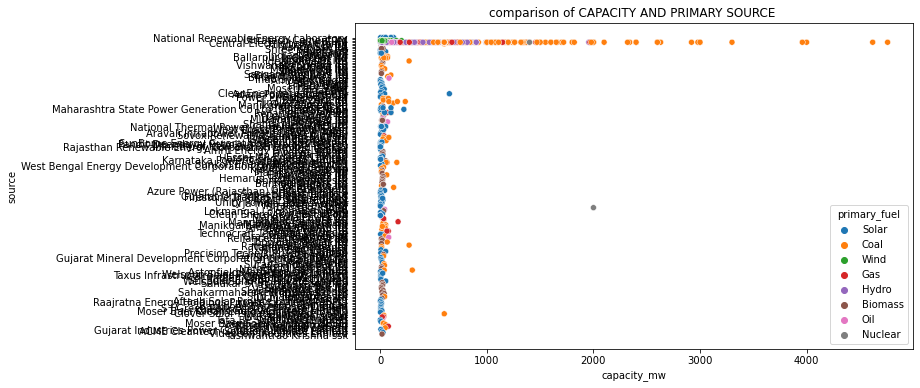

In [39]:
plt.figure(figsize=[10,6])
plt.title('comparison of CAPACITY AND PRIMARY SOURCE ')
sns.scatterplot(df['capacity_mw'],df['source'],hue=df['primary_fuel'])

THE CENTRAL ELECTRICITY AUTHORITY HOLDS HIGH CAPACITY COAL PLANTS

<AxesSubplot:title={'center':'comparison of OWNER AND SOURCE '}, xlabel='owner', ylabel='source'>

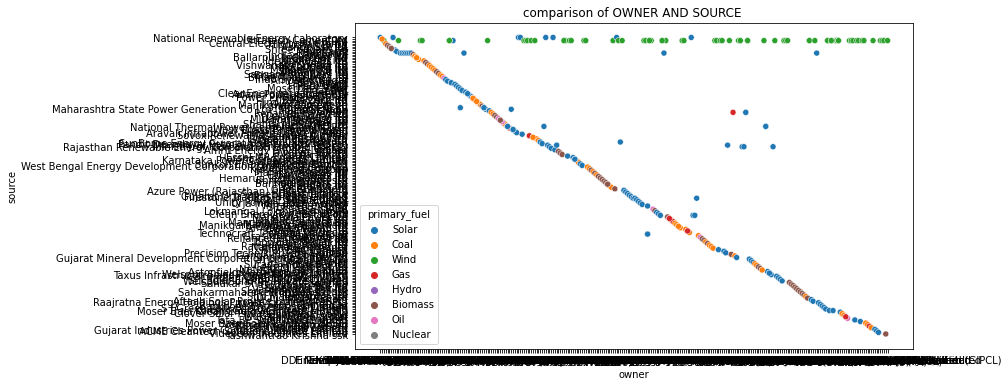

In [40]:
plt.figure(figsize=[10,6])
plt.title('comparison of OWNER AND SOURCE ')
sns.scatterplot(df['owner'],df['source'],hue=df['primary_fuel'])

NATIONAL RENEWABLE ENERGY LABORATORY HOLDS ALL WIND PLANTS AND MOST SOLAR PLANTS,OTHER PLANTS MOSTLY DEPENDING COAL,HYDRO

<AxesSubplot:title={'center':'comparison of LATTITUDE AND LONGITUDE '}, xlabel='latitude', ylabel='longitude'>

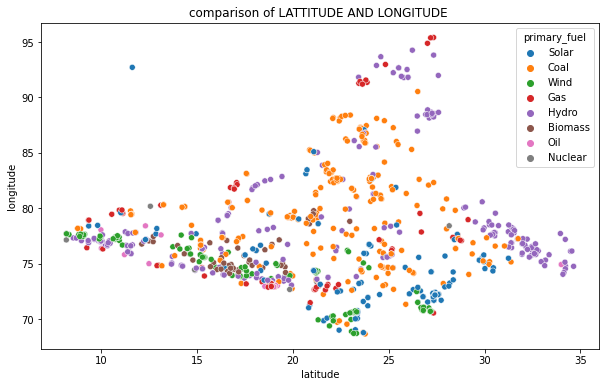

In [41]:
plt.figure(figsize=[10,6])
plt.title('comparison of LATTITUDE AND LONGITUDE ')
sns.scatterplot(df['latitude'],df['longitude'],hue=df['primary_fuel'])

WIND PLANTS ARE SITUATED IN A BETWEEN LONGITUDE 70 AND 80,,LIKE HYDRO PLANTS ARE COMMON IN 30 TO 35 LATTITUDE,COL PREAD ALL OVER THE AREA

<AxesSubplot:title={'center':'comparison of COMMISIONING YEAR AND SORCE '}, xlabel='commissioning_year', ylabel='source'>

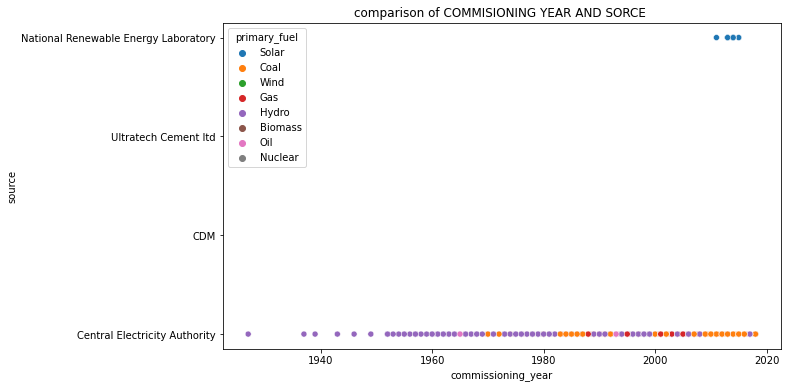

In [42]:
plt.figure(figsize=[10,6])
plt.title('comparison of COMMISIONING YEAR AND SORCE ')
sns.scatterplot(df['commissioning_year'],df['source'],hue=df['primary_fuel'])

CENTRAL ELECTRICITY AUTHORITY COMMISIONED MOST OF HYDRO PLANTS IN 19 S AND THEN SHIFTED TO COAL,THE RENEWABLE ENERGY LAB DEPENDING SOLAR AND WIND

<AxesSubplot:title={'center':'comparison of PRIMARY FUEL AND SOURCE '}, xlabel='primary_fuel', ylabel='source'>

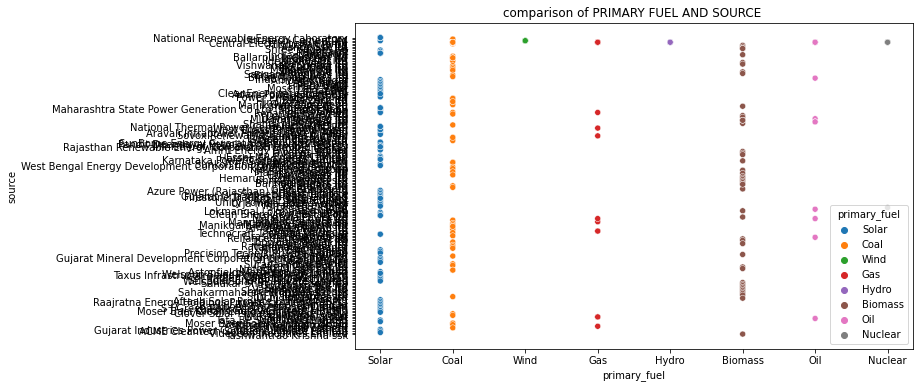

In [43]:
plt.figure(figsize=[10,6])
plt.title('comparison of PRIMARY FUEL AND SOURCE ')
sns.scatterplot(df['primary_fuel'],df['source'],hue=df['primary_fuel'])

# multivariate analysis

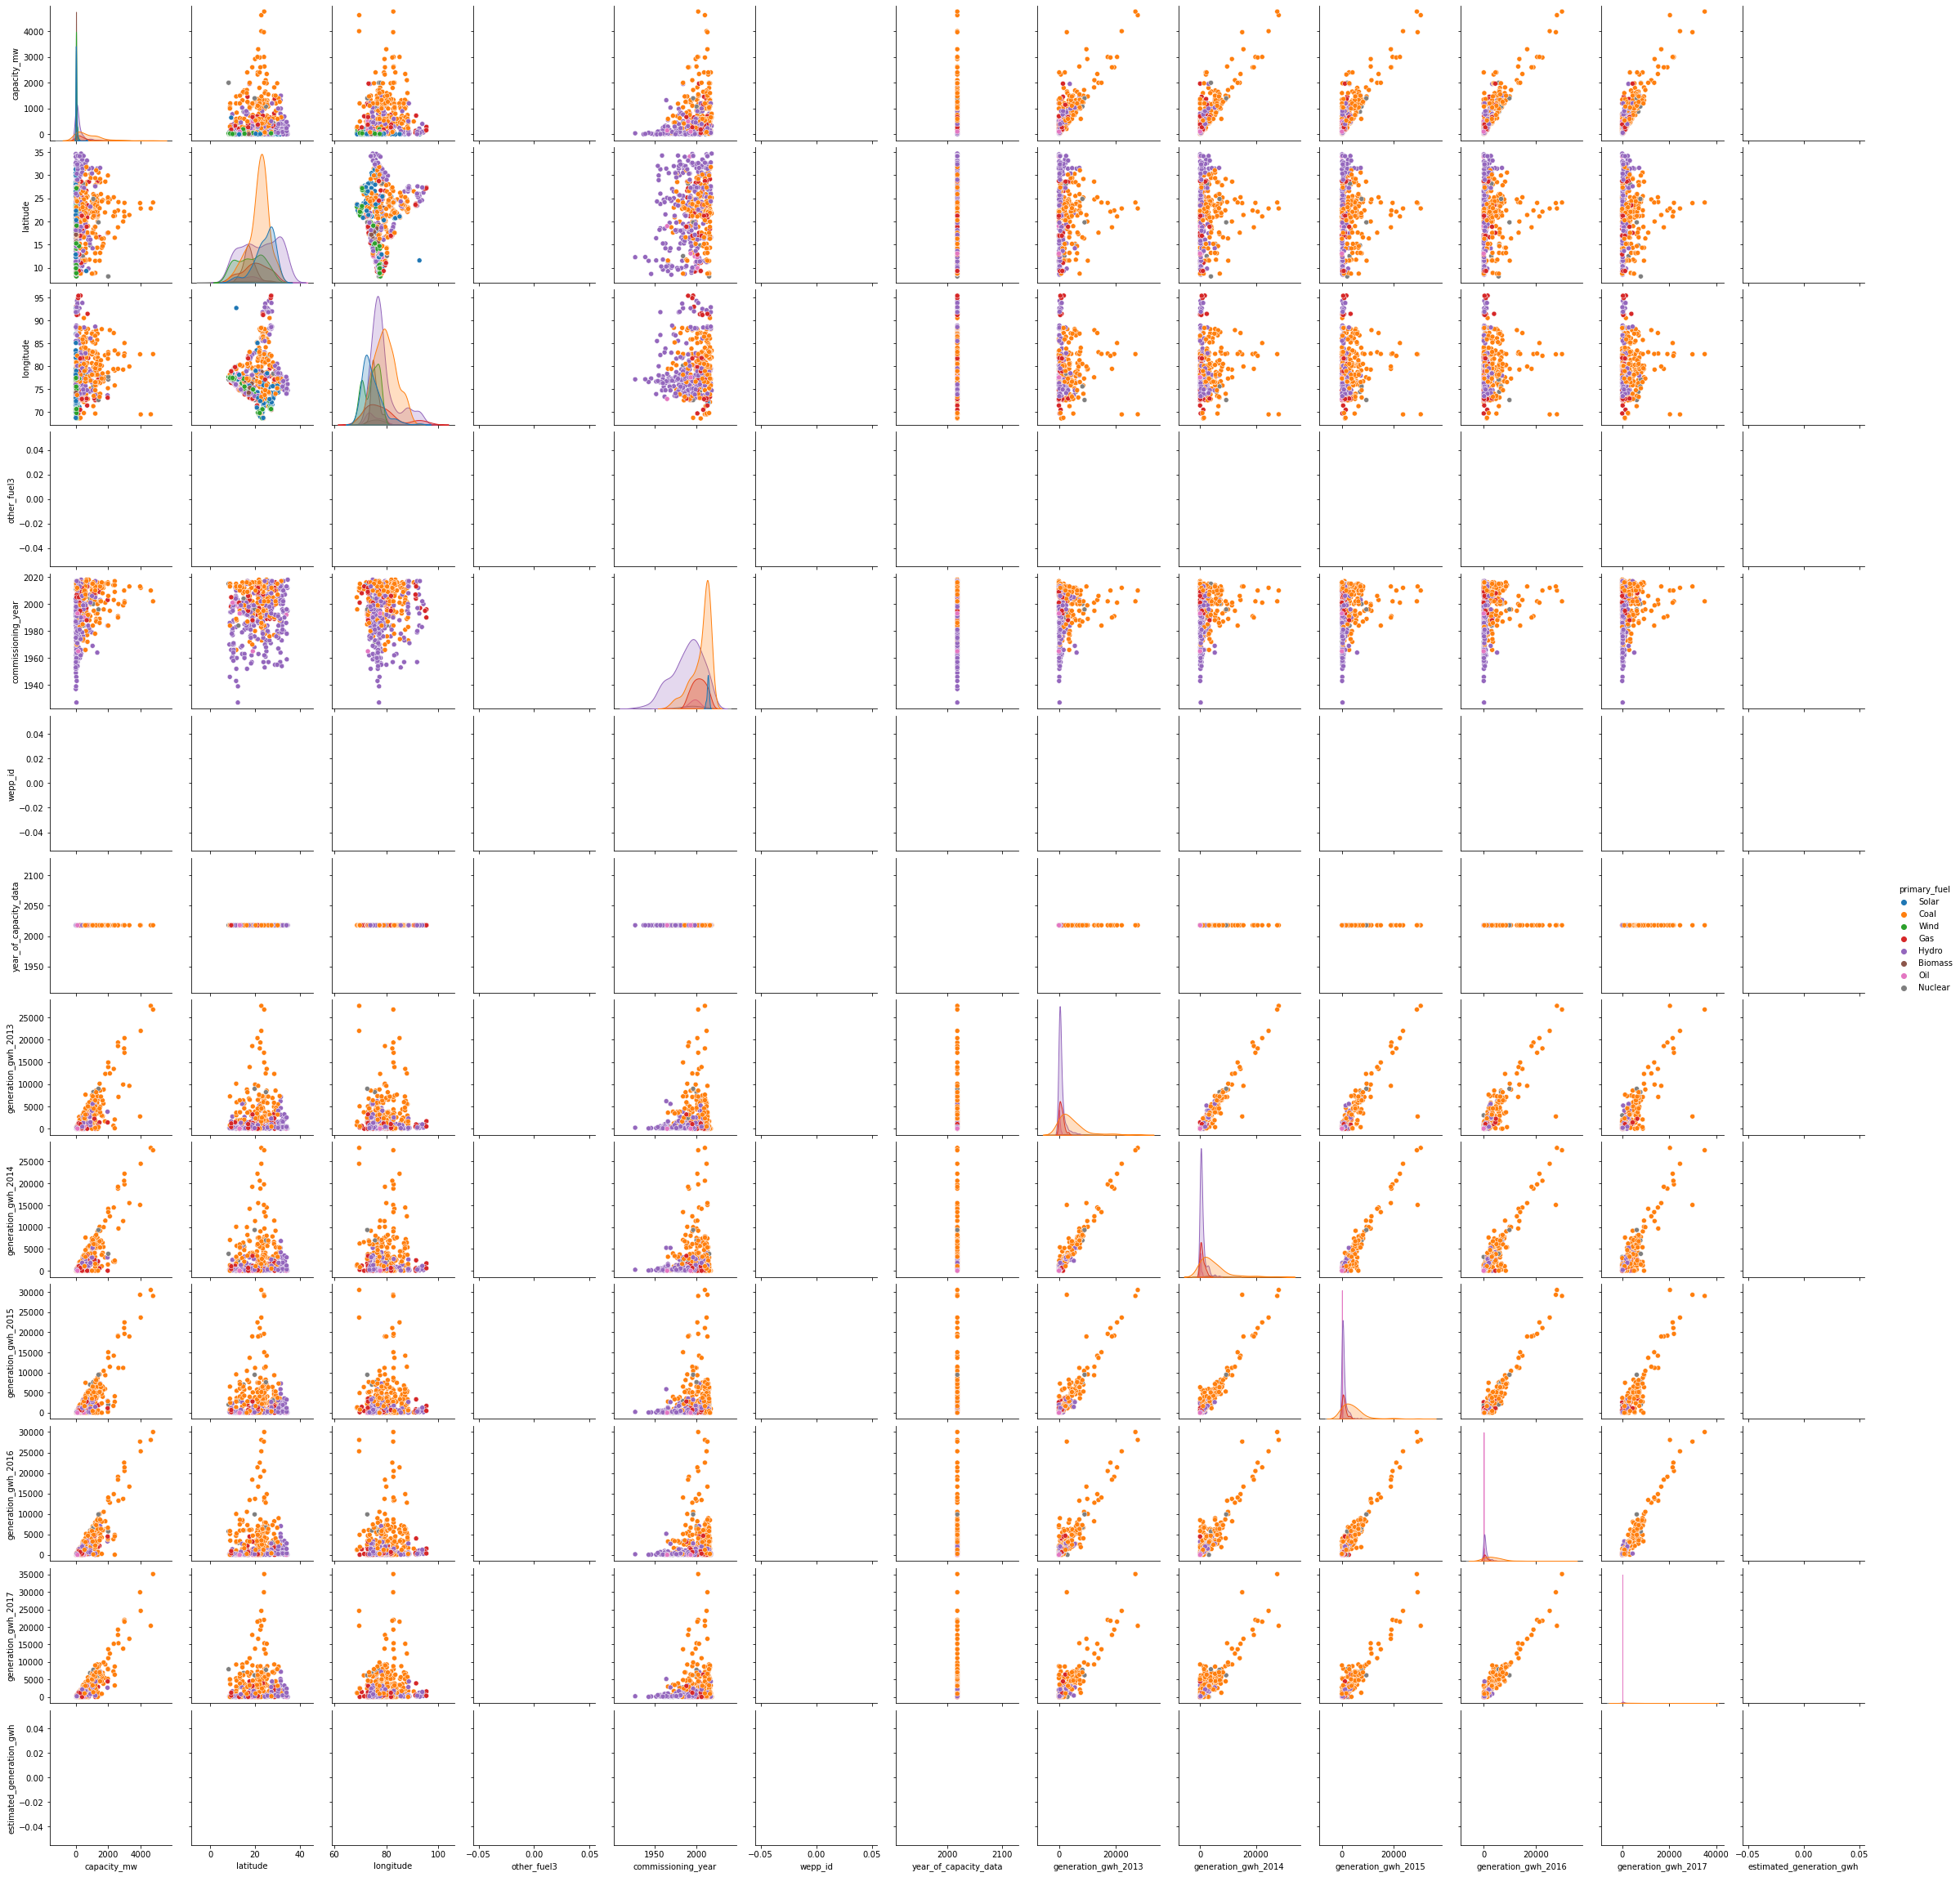

In [44]:
sns.pairplot(df,hue="primary_fuel")

THE ABSENCE OF NULL PRESENCE AND SINGLE VALUED CLASSES ARE VISIBLE IN PAIRPLOT

# PREPROCESSING OF DATA

# MANUALLY HANDLING(DROPPING) SINGLE VALUED COLUMNS 

THE SINGLE VALUED COLUMNS ARE NOT CONTRIBUTING TO TARGET SO DROPPING IT

THE SINGLE VALUED COLUMNS ARE:country,year_of_capacity_data,country_long,

In [45]:
df.drop(['country'],axis=1,inplace=True)

In [46]:
df.drop(['country_long'],axis=1,inplace=True)

In [47]:
df.drop(['year_of_capacity_data'],axis=1,inplace=True)

In [48]:
df.drop(['generation_data_source'],axis=1,inplace=True)

In [49]:
df.drop(['other_fuel2'],axis=1,inplace=True)

# TREATING NULL VALUES(DROPPING MORE 50% NULL PRESENCE AND TREATING)

In [50]:
df.isnull().sum()

name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
estimated_generation_gwh    908
dtype: int64

COLUMNS WITH 50% AND MORE NULL PRESENCE:estimated_generation_gwh(100%),wepp_id(100%),other_fuel3(100%),
other_fuel1(around 80%),owner(around 60%),generation_gwh_2013(around 60%),generation_gwh_2014(around60%),,
generation_gwh_2015(more 50%),,generation_gwh_2016(more 50%),generation_gwh_2017(MORE 50%)

In [51]:
df.drop(['estimated_generation_gwh'],axis=1,inplace=True)

In [52]:
df.drop(['other_fuel3'],axis=1,inplace=True)

In [53]:
df.drop(['wepp_id'],axis=1,inplace=True)

In [54]:
df.drop(['other_fuel1'],axis=1,inplace=True)

In [55]:
df.drop(['owner'],axis=1,inplace=True)

In [56]:
df.drop(['generation_gwh_2013'],axis=1,inplace=True)

In [57]:
df.drop(['generation_gwh_2014'],axis=1,inplace=True)

In [58]:
df.drop(['generation_gwh_2015'],axis=1,inplace=True)

In [59]:
df.drop(['generation_gwh_2016'],axis=1,inplace=True)

In [60]:
df.drop(['generation_gwh_2017'],axis=1,inplace=True)

TREATING OTHER NULL VALUES

In [61]:
df.isnull().sum()

name                    0
gppd_idnr               0
capacity_mw             0
latitude               46
longitude              46
primary_fuel            0
commissioning_year    380
source                  0
url                     0
geolocation_source     19
dtype: int64

TO TREAT DATATYPES TO TREAT NULL

In [62]:
df.dtypes

name                   object
gppd_idnr              object
capacity_mw           float64
latitude              float64
longitude             float64
primary_fuel           object
commissioning_year    float64
source                 object
url                    object
geolocation_source     object
dtype: object

float variable null values treating by mean and object by mode

In [63]:
df['latitude']=df['latitude'].fillna(df['latitude'].mean())

In [64]:
df['longitude']=df['longitude'].fillna(df['longitude'].mean())

In [65]:
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].mean())

In [66]:
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [67]:
df.isnull().sum()

name                  0
gppd_idnr             0
capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
source                0
url                   0
geolocation_source    0
dtype: int64

<AxesSubplot:>

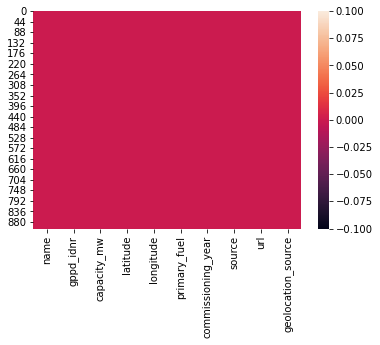

In [68]:
sns.heatmap(df.isnull())

null presence is cleared

# PLOTTING BOX PLOT FOR CHECKING OUTLIERS

<AxesSubplot:xlabel='capacity_mw'>

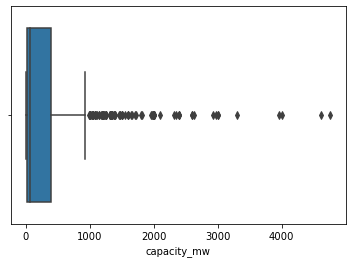

In [69]:
sns.boxplot(df['capacity_mw'])

capacity_mw has outlier presence

<AxesSubplot:xlabel='latitude'>

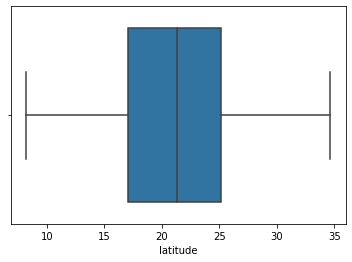

In [70]:
sns.boxplot(df['latitude'])

latitude dont hav outliers

<AxesSubplot:xlabel='longitude'>

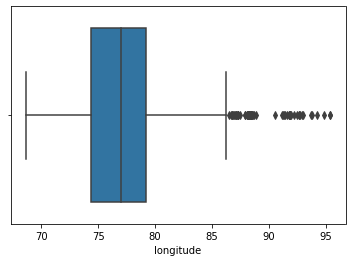

In [71]:
sns.boxplot(df['longitude'])

longitude have outliers in data

<AxesSubplot:xlabel='commissioning_year'>

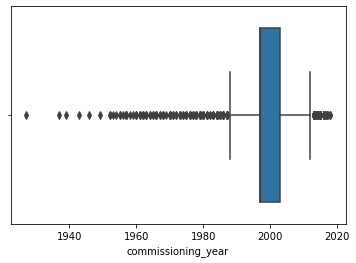

In [72]:
sns.boxplot(df['commissioning_year'])

commisioning years has outliers

WEV HAVE TO TREAT OUTLIERS AFTERWARDS

# ENCODING

In [73]:
df.dtypes

name                   object
gppd_idnr              object
capacity_mw           float64
latitude              float64
longitude             float64
primary_fuel           object
commissioning_year    float64
source                 object
url                    object
geolocation_source     object
dtype: object

OBJECT DTYPES ARE THERE IN DATASET WE WANT TO CONVERT THESE

In [74]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [75]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [76]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source
0,0.0,658.0,2.5,28.1839,73.2407,6.0,2011.000000,109.0,128.0,1.0
1,1.0,520.0,98.0,24.7663,74.6090,1.0,1996.876894,174.0,173.0,2.0
2,2.0,854.0,39.2,21.9038,69.3732,7.0,1996.876894,21.0,205.0,2.0
3,3.0,0.0,135.0,23.8712,91.3602,2.0,2004.000000,22.0,58.0,2.0
4,4.0,1.0,1800.0,21.9603,82.4091,1.0,2015.000000,22.0,58.0,2.0
...,...,...,...,...,...,...,...,...,...,...
903,903.0,494.0,1600.0,16.2949,77.3568,1.0,2016.000000,22.0,58.0,2.0
904,904.0,823.0,3.0,12.8932,78.1654,6.0,1996.876894,77.0,22.0,0.0
905,905.0,892.0,25.5,15.2758,75.5811,7.0,1996.876894,21.0,260.0,2.0
906,906.0,540.0,80.0,24.3500,73.7477,1.0,1996.876894,59.0,82.0,2.0


In [77]:
df.dtypes

name                  float64
gppd_idnr             float64
capacity_mw           float64
latitude              float64
longitude             float64
primary_fuel          float64
commissioning_year    float64
source                float64
url                   float64
geolocation_source    float64
dtype: object

data columns are encoded successfully

# TREATING OUTLIERS

outliers are surely there in data we want to treat those

In [78]:
df.shape

(908, 10)

In [79]:
from scipy.stats import zscore

In [80]:
z=np.abs(zscore(df))

In [81]:
new_df=df[(z<3).all(axis=1)]

In [82]:
new_df.shape

(839, 10)

DATA LOSS IS VERY LESS AND WE CAN PROCEED FURTHER

# CORRELATION AND HEATMAP

In [83]:
cor=new_df.corr()

In [84]:
cor

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source
name,1.000000,0.336288,0.047644,-0.146798,0.020600,0.044641,-0.022413,-0.034857,0.044438,0.041406
gppd_idnr,0.336288,1.000000,-0.405104,-0.097080,-0.388640,0.618327,0.000882,0.401497,0.598131,-0.454326
capacity_mw,0.047644,-0.405104,1.000000,0.050467,0.273652,-0.413624,0.285324,-0.274418,-0.280664,0.239153
latitude,-0.146798,-0.097080,0.050467,1.000000,-0.027019,-0.014885,0.104453,0.073116,-0.131322,-0.194249
longitude,0.020600,-0.388640,0.273652,-0.027019,1.000000,-0.397070,0.163241,-0.248924,-0.307258,0.277548
primary_fuel,0.044641,0.618327,-0.413624,-0.014885,-0.397070,1.000000,-0.146322,0.065956,0.606283,-0.470736
commissioning_year,-0.022413,0.000882,0.285324,0.104453,0.163241,-0.146322,1.000000,-0.007850,-0.026160,0.020153
source,-0.034857,0.401497,-0.274418,0.073116,-0.248924,0.065956,-0.007850,1.000000,0.129860,-0.521804
url,0.044438,0.598131,-0.280664,-0.131322,-0.307258,0.606283,-0.026160,0.129860,1.000000,-0.001556
geolocation_source,0.041406,-0.454326,0.239153,-0.194249,0.277548,-0.470736,0.020153,-0.521804,-0.001556,1.000000


<AxesSubplot:>

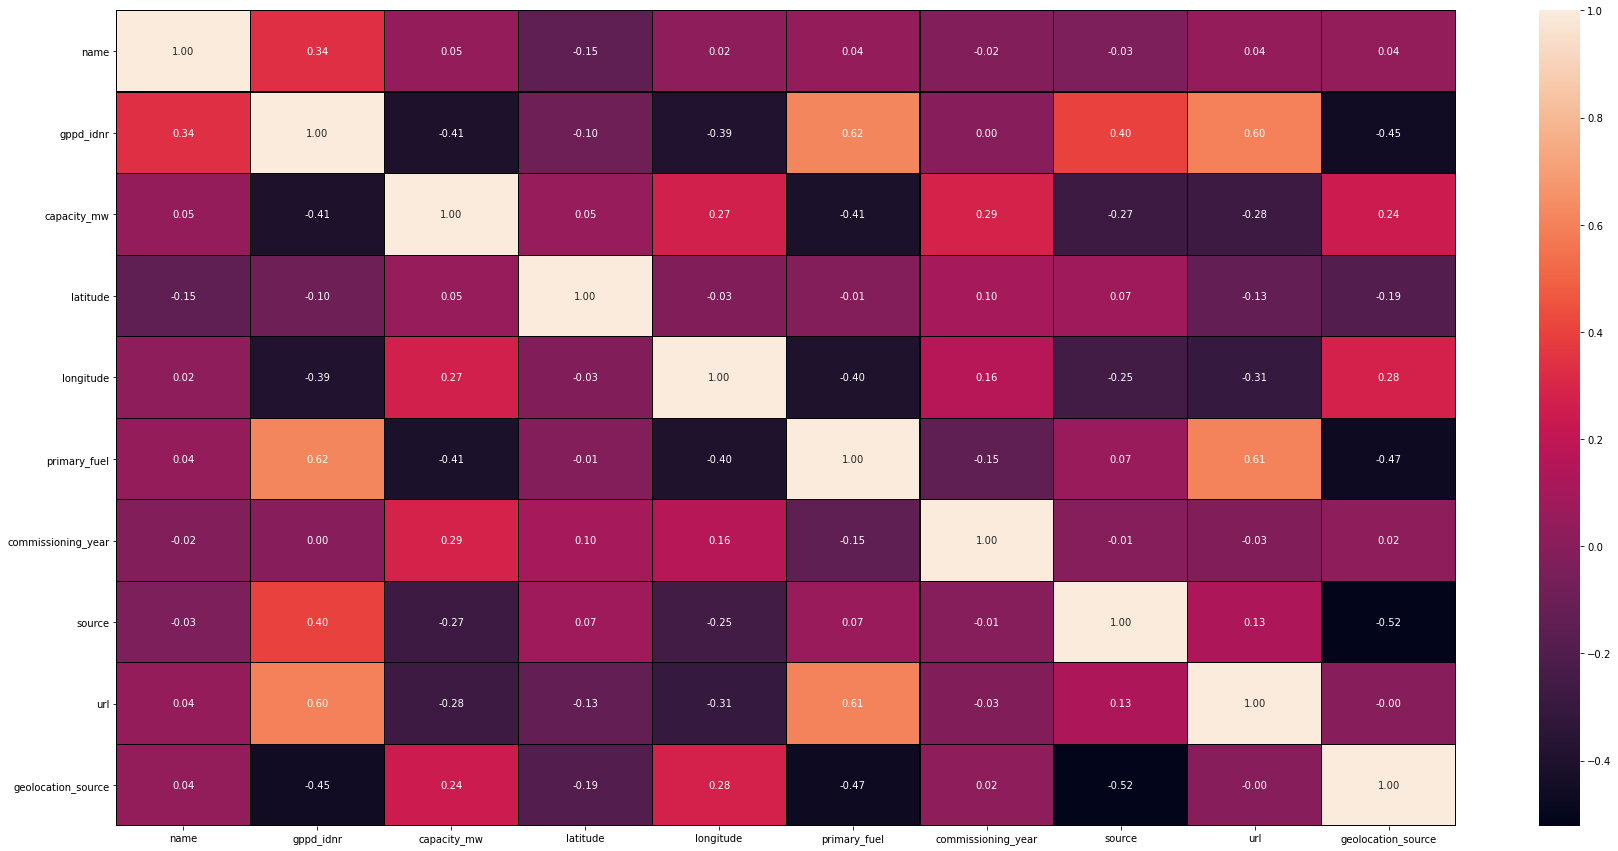

In [85]:
plt.figure(figsize=(30,15))
sns.heatmap(cor,annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

HEAT MAP SHOWS THE CORRELATION OF THE COLUMNS

TO GET THE TARGET DEPENDENCY WE CAN PLOT OTHER PLOT FOR ANALYSIS

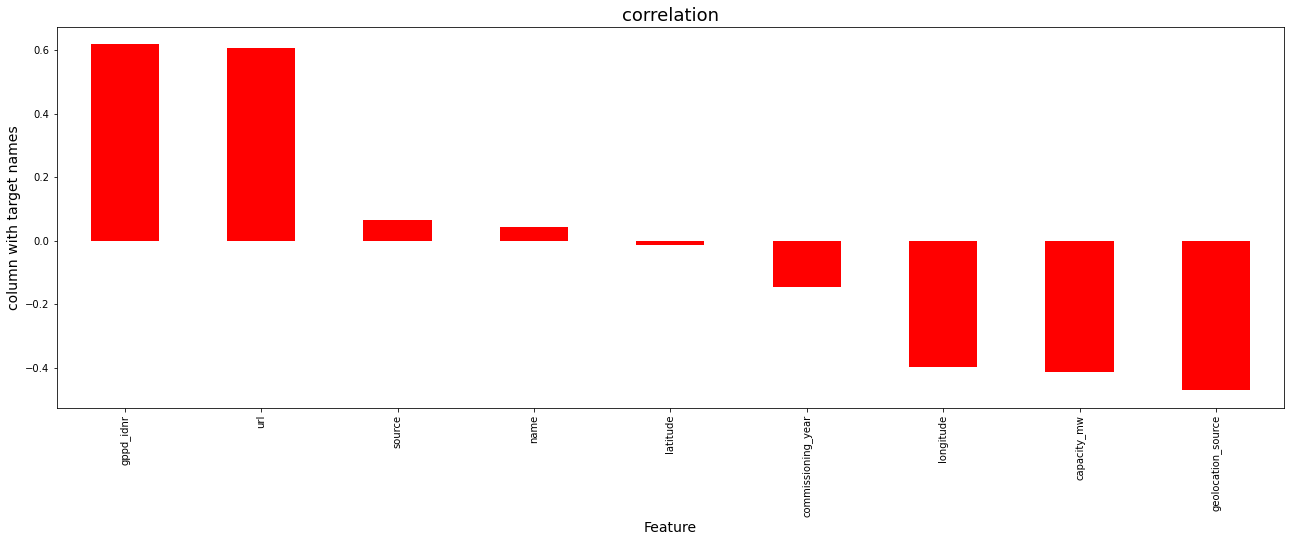

In [86]:
plt.figure(figsize=(22,7))
cor['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

figure clearley showing the relation of each columns with the target primary fuel

# SKEWNESS REMOVAL

In [87]:
new_df.skew()

name                  0.016115
gppd_idnr            -0.048199
capacity_mw           1.964097
latitude             -0.109264
longitude             0.846704
primary_fuel          0.419942
commissioning_year   -0.853850
source                1.794155
url                   1.441613
geolocation_source   -2.114267
dtype: float64

amount of skewness is there in some columns like capacity_mw,longitude,commissioning_year,source,url,geolocation_source

HISTOGRAM CONVEYS THIS SKEWNESS PRESENCE

<AxesSubplot:ylabel='Frequency'>

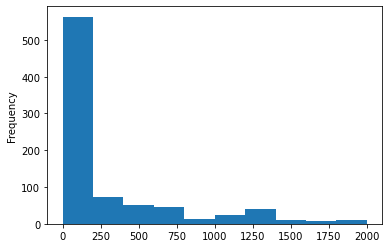

In [88]:
new_df['capacity_mw'].plot.hist()

SKEWNESS IS THERE

<AxesSubplot:ylabel='Frequency'>

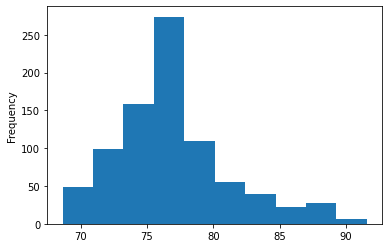

In [89]:
new_df['longitude'].plot.hist()

skewness is clear from the plot

<AxesSubplot:ylabel='Frequency'>

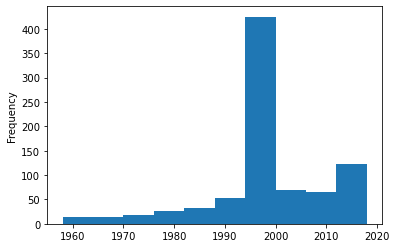

In [90]:
new_df['commissioning_year'].plot.hist()

commisioning year has skewness presence

<AxesSubplot:ylabel='Frequency'>

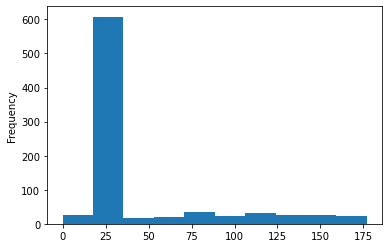

In [91]:
new_df['source'].plot.hist()

source also has skewness

<AxesSubplot:ylabel='Frequency'>

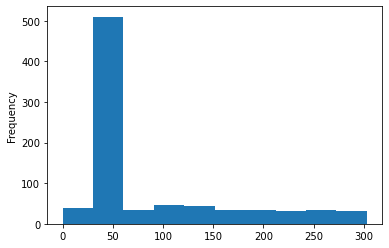

In [92]:
new_df['url'].plot.hist()

url has skewness presence

<AxesSubplot:ylabel='Frequency'>

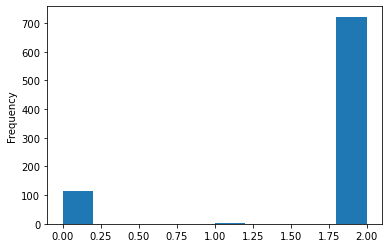

In [93]:
new_df['geolocation_source'].plot.hist()

geolocation source contains skewness

# SPLITTING X AND Y AND APPLYING POWER TRANSFORMER TO AVOID SKEWNESS

In [94]:
from sklearn.preprocessing import PowerTransformer

In [95]:
x=new_df.drop("primary_fuel",axis=1)
y=new_df["primary_fuel"]

In [96]:
x

,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,source,url,geolocation_source
0,0.0,658.0,2.5,28.1839,73.2407,2011.000000,109.0,128.0,1.0
1,1.0,520.0,98.0,24.7663,74.6090,1996.876894,174.0,173.0,2.0
2,2.0,854.0,39.2,21.9038,69.3732,1996.876894,21.0,205.0,2.0
3,3.0,0.0,135.0,23.8712,91.3602,2004.000000,22.0,58.0,2.0
4,4.0,1.0,1800.0,21.9603,82.4091,2015.000000,22.0,58.0,2.0
...,...,...,...,...,...,...,...,...,...
903,903.0,494.0,1600.0,16.2949,77.3568,2016.000000,22.0,58.0,2.0
904,904.0,823.0,3.0,12.8932,78.1654,1996.876894,77.0,22.0,0.0
905,905.0,892.0,25.5,15.2758,75.5811,1996.876894,21.0,260.0,2.0
906,906.0,540.0,80.0,24.3500,73.7477,1996.876894,59.0,82.0,2.0


In [97]:
y

0      6.0
1      1.0
2      7.0
3      2.0
4      1.0
      ... 
903    1.0
904    6.0
905    7.0
906    1.0
907    7.0
Name: primary_fuel, Length: 839, dtype: float64

In [98]:
x.shape

(839, 9)

In [99]:
y.shape

(839,)

In [100]:
pt=PowerTransformer(method="yeo-johnson")

In [101]:
X_power=pt.fit_transform(x)

In [102]:
df1=pd.DataFrame(X_power,columns=x.columns)

In [103]:
df1.skew()

name                 -0.288255
gppd_idnr            -0.313803
capacity_mw           0.009327
latitude             -0.072292
longitude            -0.000206
commissioning_year    0.026649
source               -0.182952
url                   0.064731
geolocation_source   -2.086058
dtype: float64

geolocation_source again have skewness,we have to treat it

In [104]:
from scipy import sqrt

In [105]:
df1["geolocation_source"]=np.sqrt(df1["geolocation_source"])

In [106]:
df1.skew()

name                 -0.288255
gppd_idnr            -0.313803
capacity_mw           0.009327
latitude             -0.072292
longitude            -0.000206
commissioning_year    0.026649
source               -0.182952
url                   0.064731
geolocation_source    0.000000
dtype: float64

skewness removed completely

histogram conveys the absence of skewness

<AxesSubplot:ylabel='Frequency'>

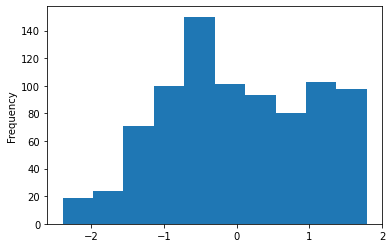

In [107]:
df1['capacity_mw'].plot.hist()

skewness is removed from data

<AxesSubplot:ylabel='Frequency'>

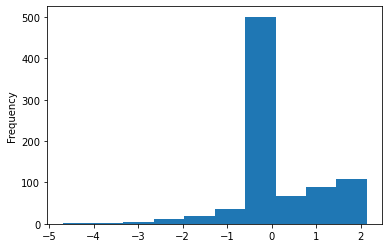

In [109]:
df1['url'].plot.hist()

skewness is removed from url

<AxesSubplot:ylabel='Frequency'>

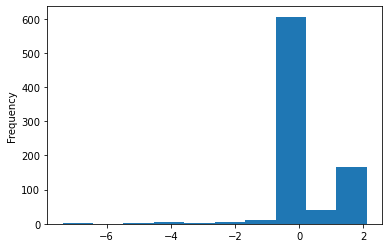

In [110]:
df1['source'].plot.hist()

skewness is well treated in source

<AxesSubplot:ylabel='Frequency'>

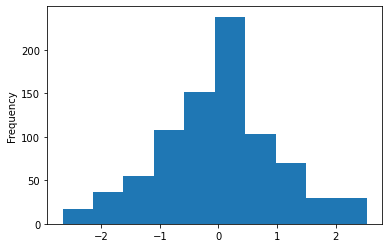

In [111]:
df1['longitude'].plot.hist()

skewness is removed from longitude

# SAMPLING TARGET

target classes are not balanced we have to balance that data,so we are depending sampling technique for it

HERE PREFERING SMOTE OR OVERSAMPLING

In [112]:
from imblearn.over_sampling import SMOTE

In [113]:
sm=SMOTE()

In [114]:
x1,y1=sm.fit_resample(x,y)

In [115]:
y1

0       6.0
1       1.0
2       7.0
3       2.0
4       1.0
       ... 
1891    7.0
1892    7.0
1893    7.0
1894    7.0
1895    7.0
Name: primary_fuel, Length: 1896, dtype: float64

In [116]:
y1.value_counts()

0.0    237
6.0    237
3.0    237
2.0    237
7.0    237
5.0    237
1.0    237
4.0    237
Name: primary_fuel, dtype: int64

now the target data is balanced successfully

# MULTICOLLINEARITY

USING VIF FOR CHECKING MULTICOLLINEARITY

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x1.values,i)for i in range(x1.shape[1])]
    vif['Features']=x1.columns
    print(vif)

In [120]:
vif_calc()

   VIF Factor            Features
0    5.852552                name
1   15.836552           gppd_idnr
2    1.720052         capacity_mw
3   15.708372            latitude
4  605.173314           longitude
5  692.817900  commissioning_year
6    3.097430              source
7    6.229610                 url
8   15.270054  geolocation_source


commisioning year and longitudes have high vif and from correlation plot these columns are negatively correlated to target so dropping both

In [121]:
df1.drop(['commissioning_year'],axis=1,inplace=True)

In [122]:
df1.drop(['longitude'],axis=1,inplace=True)

# SCALING FEATURES

In [124]:
from sklearn.preprocessing import StandardScaler

In [125]:
sc=StandardScaler()

In [126]:
x1=sc.fit_transform(x1)

In [127]:
x1

array([[-1.84815144,  0.74694564, -0.62836334, ...,  1.37603579,
         0.44269761, -1.1703463 ],
       [-1.84407724,  0.20167886, -0.4140894 , ...,  2.84553498,
         1.09100546,  0.37174849],
       [-1.84000303,  1.52138251, -0.54601933, ..., -0.61344003,
         1.55202437,  0.37174849],
       ...,
       [ 1.65799735,  0.79643825, -0.56569519, ..., -0.61344003,
         1.51831399,  0.37174849],
       [ 1.21259532,  1.6553583 , -0.61055682, ..., -0.61344003,
         1.32471163,  0.37174849],
       [ 1.20666659,  1.65805038, -0.59169757, ..., -0.61344003,
         1.32151492,  0.37174849]])

# SPLITTING AND APPLYING ALGORITHMS

we have x1 y1 that we already splitted for preprocessing steps

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=15)

In [130]:
x_train.shape

(1327, 9)

In [131]:
x_test.shape

(569, 9)

In [132]:
y_train.shape

(1327,)

In [133]:
y_test.shape

(569,)

HERE WE ARE GOING TO APPLY CLASSIFICATION ALGORITHMS FOR PREDICTION

# DECISION TREE CLASSSIFIER

In [134]:
from sklearn.tree import DecisionTreeClassifier

In [135]:
dtc=DecisionTreeClassifier()

In [136]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [137]:
dtc.score(x_train,y_train)

1.0

In [138]:
preddtc=dtc.predict(x_test)

In [139]:
print(preddtc)

[2. 6. 7. 6. 5. 2. 4. 4. 4. 0. 1. 5. 6. 4. 0. 5. 7. 4. 3. 0. 3. 5. 2. 3.
 0. 1. 5. 2. 4. 6. 4. 1. 0. 3. 2. 5. 6. 5. 7. 2. 0. 2. 5. 1. 7. 6. 7. 4.
 4. 4. 6. 6. 1. 0. 2. 2. 7. 5. 5. 2. 7. 0. 7. 1. 3. 4. 1. 7. 7. 2. 0. 1.
 5. 1. 7. 2. 0. 7. 5. 1. 1. 6. 2. 5. 1. 3. 3. 0. 0. 3. 3. 1. 1. 1. 0. 6.
 4. 4. 6. 4. 3. 3. 4. 0. 4. 4. 0. 0. 6. 7. 2. 4. 0. 1. 3. 4. 3. 7. 5. 5.
 0. 6. 1. 0. 3. 7. 1. 7. 0. 2. 5. 3. 7. 7. 1. 7. 2. 6. 6. 0. 4. 2. 3. 3.
 5. 4. 7. 3. 4. 4. 5. 4. 3. 3. 7. 6. 5. 5. 5. 2. 2. 4. 7. 4. 7. 4. 7. 6.
 4. 5. 3. 3. 7. 0. 3. 0. 6. 1. 4. 4. 1. 5. 7. 3. 4. 2. 5. 1. 5. 7. 4. 1.
 5. 3. 5. 7. 6. 0. 4. 4. 1. 6. 0. 3. 4. 6. 3. 0. 2. 6. 2. 3. 5. 7. 2. 6.
 6. 0. 0. 2. 6. 3. 4. 1. 5. 3. 2. 6. 3. 3. 6. 3. 2. 2. 4. 4. 0. 0. 7. 4.
 6. 1. 7. 1. 7. 4. 0. 3. 7. 6. 6. 2. 7. 0. 3. 7. 6. 7. 1. 0. 5. 5. 6. 5.
 7. 3. 5. 4. 1. 6. 1. 5. 7. 7. 0. 2. 6. 4. 0. 7. 3. 6. 1. 5. 7. 2. 5. 5.
 5. 3. 4. 5. 5. 0. 1. 4. 3. 4. 0. 4. 0. 0. 2. 4. 4. 5. 5. 5. 3. 1. 1. 4.
 1. 2. 7. 4. 2. 4. 3. 2. 1. 7. 3. 7. 4. 7. 0. 3. 1.

# accuracy score ,confusion matrix,classification report

In [141]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [142]:
accdtc=classification_report(y_test,preddtc)

In [143]:
print(accdtc)

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98        71
         1.0       0.65      0.73      0.69        62
         2.0       0.81      0.69      0.75        72
         3.0       0.70      0.71      0.71        70
         4.0       0.88      0.89      0.89        74
         5.0       0.90      0.92      0.91        65
         6.0       0.99      0.99      0.99        78
         7.0       1.00      1.00      1.00        77

    accuracy                           0.87       569
   macro avg       0.86      0.86      0.86       569
weighted avg       0.87      0.87      0.87       569



In [144]:
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

[[69  1  1  0  0  0  0  0]
 [ 1 45  7  4  4  1  0  0]
 [ 0  7 50 11  2  1  1  0]
 [ 0 11  3 50  3  3  0  0]
 [ 0  1  1  5 66  1  0  0]
 [ 0  4  0  1  0 60  0  0]
 [ 0  0  0  0  0  1 77  0]
 [ 0  0  0  0  0  0  0 77]]
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98        71
         1.0       0.65      0.73      0.69        62
         2.0       0.81      0.69      0.75        72
         3.0       0.70      0.71      0.71        70
         4.0       0.88      0.89      0.89        74
         5.0       0.90      0.92      0.91        65
         6.0       0.99      0.99      0.99        78
         7.0       1.00      1.00      1.00        77

    accuracy                           0.87       569
   macro avg       0.86      0.86      0.86       569
weighted avg       0.87      0.87      0.87       569



WE GOT ACCURACY SCORE:87

# K-NEAREST NEIGHBOR

In [145]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [146]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [147]:
predknn=knn.predict(x_test)

In [148]:
print(predknn)

[2. 6. 7. 6. 5. 2. 4. 4. 4. 0. 1. 5. 6. 4. 0. 0. 7. 4. 3. 0. 3. 5. 2. 3.
 0. 0. 5. 2. 4. 6. 4. 3. 0. 4. 3. 3. 6. 5. 7. 2. 0. 2. 2. 2. 7. 6. 7. 4.
 4. 4. 6. 6. 1. 0. 2. 5. 7. 2. 5. 2. 7. 0. 7. 3. 5. 4. 5. 7. 7. 2. 0. 1.
 2. 1. 7. 2. 0. 7. 3. 1. 1. 6. 2. 5. 3. 4. 3. 0. 0. 3. 3. 1. 2. 1. 0. 6.
 4. 4. 6. 4. 2. 2. 4. 0. 4. 4. 0. 0. 6. 7. 2. 4. 0. 5. 3. 4. 5. 7. 5. 5.
 0. 6. 4. 0. 3. 7. 5. 7. 0. 2. 5. 3. 7. 7. 0. 7. 1. 6. 6. 0. 4. 2. 4. 3.
 5. 4. 7. 3. 4. 4. 5. 4. 3. 2. 7. 6. 5. 5. 5. 2. 5. 4. 7. 4. 7. 4. 7. 6.
 4. 3. 3. 1. 7. 0. 3. 0. 6. 2. 4. 4. 2. 5. 7. 1. 4. 5. 5. 1. 4. 7. 4. 1.
 5. 3. 5. 7. 6. 0. 4. 4. 0. 6. 0. 4. 4. 6. 5. 1. 1. 6. 2. 2. 5. 7. 1. 6.
 6. 1. 0. 2. 6. 2. 4. 5. 5. 2. 5. 6. 3. 4. 6. 3. 2. 2. 4. 4. 0. 0. 7. 4.
 6. 1. 7. 1. 7. 4. 0. 4. 7. 6. 6. 2. 7. 0. 3. 7. 6. 7. 1. 0. 5. 5. 6. 5.
 7. 3. 6. 4. 1. 6. 5. 5. 7. 7. 0. 2. 6. 4. 0. 7. 2. 6. 5. 2. 7. 1. 2. 3.
 5. 4. 4. 5. 5. 0. 1. 4. 3. 4. 0. 4. 0. 5. 2. 4. 4. 5. 5. 2. 1. 4. 1. 4.
 1. 2. 7. 4. 4. 4. 2. 1. 5. 7. 3. 7. 4. 7. 0. 3. 3.

# accuracy score ,confusion matrix,classification report

In [149]:
accknn=classification_report(y_test,predknn)

In [150]:
print(accknn)

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92        71
         1.0       0.75      0.63      0.68        62
         2.0       0.70      0.79      0.75        72
         3.0       0.76      0.59      0.66        70
         4.0       0.86      1.00      0.92        74
         5.0       0.78      0.83      0.81        65
         6.0       1.00      1.00      1.00        78
         7.0       1.00      1.00      1.00        77

    accuracy                           0.85       569
   macro avg       0.85      0.85      0.84       569
weighted avg       0.85      0.85      0.85       569



In [151]:
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

[[66  3  1  0  0  1  0  0]
 [ 6 39  6  4  5  2  0  0]
 [ 0  4 57  3  1  7  0  0]
 [ 0  6 12 41  6  5  0  0]
 [ 0  0  0  0 74  0  0  0]
 [ 0  0  5  6  0 54  0  0]
 [ 0  0  0  0  0  0 78  0]
 [ 0  0  0  0  0  0  0 77]]
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92        71
         1.0       0.75      0.63      0.68        62
         2.0       0.70      0.79      0.75        72
         3.0       0.76      0.59      0.66        70
         4.0       0.86      1.00      0.92        74
         5.0       0.78      0.83      0.81        65
         6.0       1.00      1.00      1.00        78
         7.0       1.00      1.00      1.00        77

    accuracy                           0.85       569
   macro avg       0.85      0.85      0.84       569
weighted avg       0.85      0.85      0.85       569



ACCURACY SCORE IS:85

# SUPPORT VECTOR

In [152]:
from sklearn.svm import SVC

In [153]:
svc=SVC(probability=True)

In [154]:
svc.fit(x_train,y_train)

SVC(probability=True)

In [155]:
predsvc=svc.predict(x_test)

In [156]:
print(predsvc)

[2. 6. 7. 6. 5. 2. 4. 4. 4. 1. 1. 5. 6. 4. 0. 0. 7. 4. 3. 0. 3. 5. 2. 3.
 0. 1. 5. 2. 4. 6. 4. 3. 0. 3. 2. 3. 6. 1. 7. 1. 0. 4. 5. 5. 7. 6. 7. 4.
 4. 4. 6. 6. 1. 0. 3. 5. 7. 5. 5. 2. 7. 0. 7. 3. 5. 4. 5. 7. 7. 2. 0. 1.
 5. 1. 7. 2. 0. 7. 3. 1. 1. 6. 5. 3. 4. 1. 3. 0. 0. 3. 3. 1. 2. 1. 0. 6.
 4. 4. 6. 4. 3. 2. 4. 0. 4. 4. 0. 0. 6. 7. 1. 4. 0. 5. 3. 4. 5. 7. 5. 5.
 0. 6. 4. 0. 5. 7. 5. 7. 0. 2. 5. 3. 7. 7. 1. 7. 1. 6. 6. 0. 4. 2. 3. 3.
 0. 4. 7. 3. 4. 4. 5. 4. 3. 1. 7. 6. 5. 5. 5. 2. 5. 4. 7. 4. 7. 4. 7. 6.
 4. 5. 3. 3. 7. 0. 5. 5. 6. 2. 4. 4. 3. 3. 7. 1. 4. 5. 5. 1. 4. 7. 4. 1.
 5. 3. 5. 7. 6. 0. 4. 4. 0. 6. 0. 3. 4. 6. 5. 1. 1. 6. 5. 2. 5. 7. 1. 6.
 6. 1. 0. 5. 6. 5. 4. 2. 5. 2. 5. 6. 3. 4. 6. 3. 2. 2. 4. 4. 0. 0. 7. 4.
 6. 1. 7. 2. 7. 4. 0. 3. 7. 6. 6. 2. 7. 0. 3. 7. 6. 7. 3. 0. 5. 5. 6. 5.
 7. 5. 6. 4. 1. 6. 3. 5. 7. 7. 0. 2. 6. 4. 0. 7. 2. 6. 2. 1. 7. 1. 5. 3.
 5. 4. 4. 5. 5. 1. 1. 4. 2. 4. 1. 4. 0. 0. 2. 1. 4. 3. 5. 2. 1. 4. 2. 4.
 1. 2. 7. 4. 4. 4. 1. 1. 5. 7. 3. 7. 4. 7. 0. 1. 2.

# accuracy score ,confusion matrix,classification report

In [157]:
accsvc=classification_report(y_test,predsvc)

In [158]:
print(accsvc)

              precision    recall  f1-score   support

         0.0       0.92      0.83      0.87        71
         1.0       0.58      0.68      0.62        62
         2.0       0.77      0.67      0.72        72
         3.0       0.69      0.61      0.65        70
         4.0       0.88      0.97      0.92        74
         5.0       0.68      0.74      0.71        65
         6.0       1.00      1.00      1.00        78
         7.0       1.00      1.00      1.00        77

    accuracy                           0.82       569
   macro avg       0.81      0.81      0.81       569
weighted avg       0.82      0.82      0.82       569



In [159]:
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

[[59  9  0  0  0  3  0  0]
 [ 4 42  5  4  6  1  0  0]
 [ 0 12 48  1  2  9  0  0]
 [ 0  9  6 43  2 10  0  0]
 [ 0  0  0  2 72  0  0  0]
 [ 1  1  3 12  0 48  0  0]
 [ 0  0  0  0  0  0 78  0]
 [ 0  0  0  0  0  0  0 77]]
              precision    recall  f1-score   support

         0.0       0.92      0.83      0.87        71
         1.0       0.58      0.68      0.62        62
         2.0       0.77      0.67      0.72        72
         3.0       0.69      0.61      0.65        70
         4.0       0.88      0.97      0.92        74
         5.0       0.68      0.74      0.71        65
         6.0       1.00      1.00      1.00        78
         7.0       1.00      1.00      1.00        77

    accuracy                           0.82       569
   macro avg       0.81      0.81      0.81       569
weighted avg       0.82      0.82      0.82       569



ACCURACY SCORE :82

# RANDOMFOREST

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
rfc=RandomForestClassifier()

In [162]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [163]:
predrfc=rfc.predict(x_test)

In [164]:
print(predrfc)

[2. 6. 7. 6. 5. 2. 4. 4. 4. 0. 1. 5. 6. 4. 0. 1. 7. 4. 3. 0. 3. 5. 2. 3.
 0. 1. 5. 2. 4. 6. 4. 3. 0. 3. 2. 5. 6. 5. 7. 2. 0. 2. 5. 2. 7. 6. 7. 4.
 4. 4. 6. 6. 1. 0. 2. 5. 7. 5. 5. 2. 7. 0. 7. 1. 3. 4. 5. 7. 7. 2. 0. 1.
 5. 1. 7. 2. 0. 7. 3. 1. 1. 6. 2. 5. 4. 3. 3. 0. 0. 3. 3. 1. 2. 1. 0. 6.
 4. 4. 6. 4. 2. 2. 4. 0. 4. 4. 0. 0. 6. 7. 2. 4. 0. 5. 3. 4. 3. 7. 5. 5.
 0. 6. 4. 0. 3. 7. 1. 7. 0. 2. 5. 3. 7. 7. 1. 7. 1. 6. 6. 0. 4. 2. 3. 3.
 5. 4. 7. 3. 4. 4. 5. 4. 3. 1. 7. 6. 5. 5. 5. 2. 3. 4. 7. 4. 7. 4. 7. 6.
 4. 5. 3. 1. 7. 0. 3. 0. 6. 2. 4. 4. 1. 5. 7. 3. 4. 2. 5. 1. 4. 7. 3. 1.
 5. 3. 5. 7. 6. 0. 4. 4. 5. 6. 0. 3. 4. 6. 5. 0. 1. 6. 2. 3. 5. 7. 1. 6.
 6. 0. 0. 5. 6. 3. 4. 5. 5. 2. 5. 6. 3. 4. 6. 3. 2. 2. 4. 4. 0. 0. 7. 4.
 6. 1. 7. 1. 7. 4. 0. 4. 7. 6. 6. 2. 7. 0. 3. 7. 6. 7. 1. 0. 5. 5. 6. 5.
 7. 3. 6. 4. 1. 6. 5. 5. 7. 7. 0. 2. 6. 4. 0. 7. 2. 6. 1. 2. 7. 1. 5. 3.
 5. 3. 4. 5. 5. 0. 1. 4. 3. 4. 0. 4. 0. 0. 2. 1. 4. 5. 5. 2. 3. 3. 1. 4.
 1. 2. 7. 4. 4. 4. 3. 2. 1. 7. 3. 7. 4. 7. 0. 3. 2.

# accuracy score ,confusion matrix,classification report

In [165]:
accrfc=classification_report(y_test,predrfc)

In [166]:
print(accrfc)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        71
         1.0       0.77      0.79      0.78        62
         2.0       0.88      0.85      0.87        72
         3.0       0.87      0.77      0.82        70
         4.0       0.94      0.99      0.96        74
         5.0       0.93      1.00      0.96        65
         6.0       1.00      1.00      1.00        78
         7.0       1.00      1.00      1.00        77

    accuracy                           0.93       569
   macro avg       0.92      0.92      0.92       569
weighted avg       0.93      0.93      0.93       569



In [167]:
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

[[70  1  0  0  0  0  0  0]
 [ 1 49  3  4  4  1  0  0]
 [ 0  4 61  3  1  3  0  0]
 [ 0 10  5 54  0  1  0  0]
 [ 0  0  0  1 73  0  0  0]
 [ 0  0  0  0  0 65  0  0]
 [ 0  0  0  0  0  0 78  0]
 [ 0  0  0  0  0  0  0 77]]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        71
         1.0       0.77      0.79      0.78        62
         2.0       0.88      0.85      0.87        72
         3.0       0.87      0.77      0.82        70
         4.0       0.94      0.99      0.96        74
         5.0       0.93      1.00      0.96        65
         6.0       1.00      1.00      1.00        78
         7.0       1.00      1.00      1.00        77

    accuracy                           0.93       569
   macro avg       0.92      0.92      0.92       569
weighted avg       0.93      0.93      0.93       569



# CROSS VALIDATION MEAN SCORE

In [169]:
from sklearn.model_selection import cross_val_score

In [171]:
print(cross_val_score(dtc,x1,y1,cv=5).mean())

0.8328176642133037


In [172]:
print(cross_val_score(knn,x1,y1,cv=5).mean())

0.8159325093736982


In [173]:
print(cross_val_score(svc,x1,y1,cv=5).mean())

0.7874600749895848


In [174]:
print(cross_val_score(rfc,x1,y1,cv=5).mean())

0.8897653103735592


# HERE PREFERING KNN FOR FURTHER PROCEEDINGS:HYPERPARAMETER TUNING

In [175]:
from sklearn.model_selection import GridSearchCV

In [176]:
parameter={'n_neighbors':np.arange(2,10),'weights':['uniform','distance'],

           'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':[10,20,30,40]}

In [177]:
GSV=GridSearchCV(KNeighborsClassifier(),parameter,cv=5)

In [178]:
GSV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40],
                         'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

In [179]:
GSV.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 2, 'weights': 'distance'}

PASSING THESE VALUES TO MODEL

In [180]:
fuel_model=KNeighborsClassifier(algorithm='auto',leaf_size=10,
 n_neighbors=2,
 weights='distance')

In [181]:
fuel_model.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=2, weights='distance')

In [183]:
Finalpred=fuel_model.predict(x_test)

In [184]:
print(Finalpred)

[2. 6. 7. 6. 5. 2. 4. 4. 4. 0. 1. 5. 6. 4. 0. 0. 7. 4. 3. 0. 3. 5. 2. 3.
 0. 2. 5. 2. 4. 6. 4. 1. 0. 3. 3. 5. 6. 5. 7. 2. 0. 2. 5. 2. 7. 6. 7. 4.
 4. 4. 6. 6. 1. 0. 2. 5. 7. 5. 5. 2. 7. 0. 7. 1. 3. 4. 2. 7. 7. 2. 0. 1.
 5. 1. 7. 2. 0. 7. 3. 1. 1. 6. 2. 5. 3. 3. 3. 0. 0. 3. 3. 1. 2. 1. 0. 6.
 4. 4. 6. 4. 2. 2. 4. 0. 4. 4. 0. 0. 6. 7. 2. 4. 0. 5. 3. 4. 3. 7. 5. 5.
 0. 6. 4. 0. 3. 7. 5. 7. 0. 2. 5. 3. 7. 7. 1. 7. 1. 6. 6. 0. 4. 2. 3. 3.
 5. 4. 7. 3. 4. 4. 5. 4. 3. 2. 7. 6. 5. 5. 5. 2. 5. 4. 7. 4. 7. 4. 7. 6.
 4. 3. 3. 1. 7. 0. 3. 0. 6. 2. 4. 4. 3. 5. 7. 1. 4. 5. 5. 1. 4. 7. 3. 1.
 5. 3. 5. 7. 6. 0. 4. 4. 0. 6. 0. 3. 4. 6. 5. 0. 1. 6. 2. 3. 5. 7. 2. 6.
 6. 0. 0. 5. 6. 2. 4. 5. 5. 2. 5. 6. 3. 4. 6. 3. 2. 2. 4. 4. 0. 0. 7. 4.
 6. 1. 7. 1. 7. 4. 0. 4. 7. 6. 6. 2. 7. 0. 3. 7. 6. 7. 1. 0. 5. 5. 6. 5.
 7. 3. 6. 4. 1. 6. 5. 5. 7. 7. 0. 2. 6. 4. 0. 7. 2. 6. 5. 2. 7. 1. 5. 3.
 5. 3. 4. 5. 5. 0. 1. 4. 3. 4. 0. 4. 0. 0. 2. 4. 4. 5. 5. 2. 3. 3. 1. 1.
 1. 2. 7. 4. 4. 4. 3. 2. 5. 7. 3. 7. 4. 7. 0. 1. 2.

In [185]:
Finalacc=accuracy_score(y_test,Finalpred)

In [186]:
print(Finalacc)

0.8892794376098418


WE GOT THE ACCURACY OF 88.9%

# conclusion and saving

In [187]:
conclusion=pd.DataFrame([fuel_model.predict(x_test)[:],Finalpred[:]],index=["Predicted","Orginal"])

In [188]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
Predicted,2.0,6.0,7.0,6.0,5.0,2.0,4.0,4.0,4.0,0.0,...,1.0,4.0,6.0,7.0,4.0,6.0,5.0,4.0,3.0,5.0
Orginal,2.0,6.0,7.0,6.0,5.0,2.0,4.0,4.0,4.0,0.0,...,1.0,4.0,6.0,7.0,4.0,6.0,5.0,4.0,3.0,5.0


# SAVING THE MODEL

In [189]:
import joblib

In [190]:
joblib.dump(fuel_model,"fuel_model.pk1")

['fuel_model.pk1']

# POWER PLANT PROJECT[TARGET:capacity_mw]

WE COMPLETED SOME STEPS FOR THE PROCESS: WE DID EDA FOR THIS
    (ANALYSED SINGLEVARIATE ANALYSIS,BIVARIATE ANALYSIS AND MULTIVARIATE ANALYSIS FOR EDA)

*DROPPED SINGLE VALUED AND MORE THAN 50% NULL VALUE COLUMNS

*ENCODED THE OBJECT DATATYPE COLUMNS

*REMOVED OUTLIERS

SO WE COMPLETED SOME PRE PROCESSING STEPS,,SO OUR PARTIALLY PROCESSED DATA IS,,

In [191]:
new_df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source
0,0.0,658.0,2.5,28.1839,73.2407,6.0,2011.000000,109.0,128.0,1.0
1,1.0,520.0,98.0,24.7663,74.6090,1.0,1996.876894,174.0,173.0,2.0
2,2.0,854.0,39.2,21.9038,69.3732,7.0,1996.876894,21.0,205.0,2.0
3,3.0,0.0,135.0,23.8712,91.3602,2.0,2004.000000,22.0,58.0,2.0
4,4.0,1.0,1800.0,21.9603,82.4091,1.0,2015.000000,22.0,58.0,2.0
...,...,...,...,...,...,...,...,...,...,...
903,903.0,494.0,1600.0,16.2949,77.3568,1.0,2016.000000,22.0,58.0,2.0
904,904.0,823.0,3.0,12.8932,78.1654,6.0,1996.876894,77.0,22.0,0.0
905,905.0,892.0,25.5,15.2758,75.5811,7.0,1996.876894,21.0,260.0,2.0
906,906.0,540.0,80.0,24.3500,73.7477,1.0,1996.876894,59.0,82.0,2.0


we want to check the skewness

IN EARLIER STAGE WE FIND OUT THE SKEWNESS PRESENCE IN THE DATA,NOW WE WANT TO REMOVE IT

# SPLITTING X AND Y AND APPLYING POWER TRANSFORMER TO AVOID SKEWNESS

In [192]:
from sklearn.preprocessing import PowerTransformer

In [193]:
x=new_df.drop("capacity_mw",axis=1)
y=new_df["capacity_mw"]

In [195]:
x

,name,gppd_idnr,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source
0,0.0,658.0,28.1839,73.2407,6.0,2011.000000,109.0,128.0,1.0
1,1.0,520.0,24.7663,74.6090,1.0,1996.876894,174.0,173.0,2.0
2,2.0,854.0,21.9038,69.3732,7.0,1996.876894,21.0,205.0,2.0
3,3.0,0.0,23.8712,91.3602,2.0,2004.000000,22.0,58.0,2.0
4,4.0,1.0,21.9603,82.4091,1.0,2015.000000,22.0,58.0,2.0
...,...,...,...,...,...,...,...,...,...
903,903.0,494.0,16.2949,77.3568,1.0,2016.000000,22.0,58.0,2.0
904,904.0,823.0,12.8932,78.1654,6.0,1996.876894,77.0,22.0,0.0
905,905.0,892.0,15.2758,75.5811,7.0,1996.876894,21.0,260.0,2.0
906,906.0,540.0,24.3500,73.7477,1.0,1996.876894,59.0,82.0,2.0


In [196]:
x.shape

(839, 9)

In [197]:
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
903    1600.0
904       3.0
905      25.5
906      80.0
907      16.5
Name: capacity_mw, Length: 839, dtype: float64

In [198]:
y.shape

(839,)

In [199]:
pt=PowerTransformer(method="yeo-johnson")

In [200]:
X_power=pt.fit_transform(x)

In [201]:
df2=pd.DataFrame(X_power,columns=x.columns)

In [202]:
df2.skew()

name                 -0.288255
gppd_idnr            -0.313803
latitude             -0.072292
longitude            -0.000206
primary_fuel         -0.054918
commissioning_year    0.026649
source               -0.182952
url                   0.064731
geolocation_source   -2.086058
dtype: float64

geolocation_source have skewness presence so want to remove it

In [203]:
from scipy import sqrt

In [204]:
df2["geolocation_source"]=np.sqrt(df2["geolocation_source"])

In [205]:
df2.skew()

name                 -0.288255
gppd_idnr            -0.313803
latitude             -0.072292
longitude            -0.000206
primary_fuel         -0.054918
commissioning_year    0.026649
source               -0.182952
url                   0.064731
geolocation_source    0.000000
dtype: float64

skewness is removed completely,we can check it through histogram plot

<AxesSubplot:ylabel='Frequency'>

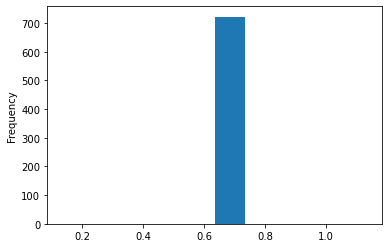

In [206]:
df2['geolocation_source'].plot.hist()

skewness removed

<AxesSubplot:ylabel='Frequency'>

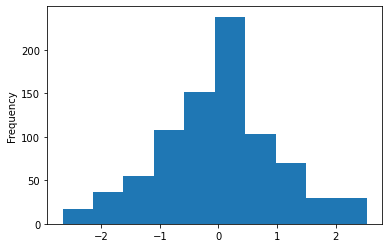

In [207]:
df2['longitude'].plot.hist()

skewness presence removed from longitude

<AxesSubplot:ylabel='Frequency'>

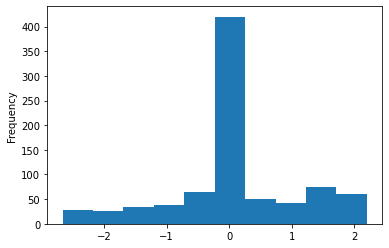

In [208]:
df2['commissioning_year'].plot.hist()

commissioning_year also removed skewness

FROM MULTIPLE HISTOGRAMS IT IS CLEAR THAT SKEWNESS SUCCESSFULLY REMOVED

# ANALYSING NEW TARGET VARIABLE:capacity_mw

In [210]:
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
903    1600.0
904       3.0
905      25.5
906      80.0
907      16.5
Name: capacity_mw, Length: 839, dtype: float64

y contains contineous values so we have to apply regression problems

# CHECKING MULTICOLLINEARITY

USING VIF FOR CHECKING MULTICOLLINEARITY

In [211]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [212]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [213]:
vif_calc()

   VIF Factor            Features
0    5.351138                name
1   13.634055           gppd_idnr
2   14.078082            latitude
3  440.485806           longitude
4   10.012712        primary_fuel
5  552.100316  commissioning_year
6    4.014957              source
7    8.341809                 url
8   22.571615  geolocation_source


LONGITUDE AND COMMISIONING YEAR HAVE HIGH VIF VALUES SO WE WANT TO DROP THOSE COLUMNS

In [214]:
df2.drop(['longitude'],axis=1,inplace=True)

In [215]:
df2.drop(['commissioning_year'],axis=1,inplace=True)

# SCALING FEATURES

In [216]:
from sklearn.preprocessing import StandardScaler

In [217]:
sc=StandardScaler()

In [218]:
x=sc.fit_transform(x)

In [219]:
x

array([[-1.70023984,  0.74628593,  1.15407869, ...,  1.58000005,
         0.44912901, -1.06064087],
       [-1.69644621,  0.2264289 ,  0.59805637, ...,  3.12714786,
         1.07944889,  0.40057044],
       [-1.69265257,  1.48463361,  0.13234537, ..., -0.51460006,
         1.52767637,  0.40057044],
       ...,
       [ 1.73299893,  1.62778265, -0.94598912, ..., -0.51460006,
         2.29806734,  0.40057044],
       [ 1.73679257,  0.3017705 ,  0.53032694, ...,  0.38988635,
        -0.19519799,  0.40057044],
       [ 1.7405862 ,  1.57127645, -1.81500177, ..., -0.51460006,
         2.08796071,  0.40057044]])

# SPLITTING AND APPLYING ALGORITHMS

WE ALREADY SPLITTED x AND y for preprosessing steps

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=.30,random_state=15)

In [222]:
x1_train.shape

(587, 9)

In [223]:
y1_train.shape

(587,)

In [224]:
x1_test.shape

(252, 9)

In [225]:
y1_test.shape

(252,)

# LINEAR REGRESSION

In [226]:
from sklearn.linear_model import LinearRegression

In [227]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [228]:
lm=LinearRegression()

In [229]:
lm.fit(x1_train,y1_train)

LinearRegression()

In [230]:
pred2=lm.predict(x1_test)

In [231]:
print(pred2)

[ 330.00386379  686.54543146   -0.95501431   -9.38598547  -73.91590681
  365.56663402  280.01019804  375.32570826  468.54550725    5.35257649
  654.2414894   347.2323943   109.19271977  285.29194393  514.66921939
  542.21368142  148.52282251  669.70415129  688.72161709  181.57175502
  241.13754093  248.37018375  479.38254472  364.56428992  173.81997076
 -205.10988752  134.23946981  293.06725555  204.193653   -196.92113771
  108.78776182  -12.96427621   10.2486242   382.07655767  666.63059009
  223.99175467  385.17595184  100.88631445  102.16931698  120.13395305
  447.7337581   129.95101218   87.01918937  368.73751579  325.64459664
 -126.04586241  411.93802026    8.93698245  288.96593974   -7.55422629
  587.03412341  595.44992614  553.40851179  268.75695423  374.20577474
 -184.27640023  147.96808563  378.46853408  101.72090548  690.82521577
  383.65591823  206.04005343  430.11510922  307.79847117  -58.83368389
  656.18496013  154.14599199  276.95454737  579.17876914  -45.41111902
   57.

# mean absolute error,mean squred error,root mean squared error

In [232]:
print("mean absolute error:",mean_absolute_error(y1_test,pred2))

mean absolute error: 262.01540396780274


In [233]:
print("mean squred error:",mean_squared_error(y1_test,pred2))

mean squred error: 145015.11651060058


In [234]:
print("root mean squared error:",np.sqrt(mean_squared_error(y1_test,pred2)))

root mean squared error: 380.8085037267427


# R2 SCORE

In [235]:
from sklearn.metrics import r2_score

In [236]:
lmscore=r2_score(y1_test,pred2)

In [237]:
print(lmscore)

0.29569814293827057


# SUPPORT VECTOR REGRESSOR

In [238]:
from sklearn.svm import SVR

In [239]:
svr=SVR(kernel="linear")

In [240]:
svr.fit(x1_train,y1_train)

SVR(kernel='linear')

In [241]:
svrpred=svr.predict(x1_test)

In [242]:
print(svrpred)

[132.09698877 274.34324023  46.99672087  -4.50858747  16.55106945
 109.98624886 153.0546337  101.06228579 137.79944288  29.36055414
 241.10484989 164.43212067 103.9937831  121.025507   252.09002863
 285.69119883  18.67672534 264.9907392  266.209388    57.0370308
 154.10040834 144.75176997 100.40156471 174.24000912  46.17031985
  -9.02264115 113.35473847 125.13503342  82.1925519  -11.94708997
 -10.93923717  27.89033311 -35.76984334 202.54256347 277.85966334
  56.00244833 211.55751874  48.44205827 101.75300965  45.22643145
 250.7459501   42.6139101   45.84997264 149.61491716 115.95638752
  -8.0700424  168.80701082  24.26396932  27.60889943  19.3544248
 296.10342035 332.15767874 227.97332103  94.16463952 116.77018432
  26.67003745  46.01514133 176.79563552  42.60208446 304.58303889
 162.03290491 121.22204132 174.98883815 132.42430361   4.95948276
 278.31120252  43.52456286 194.63018906 327.49503252  21.11703331
  20.80832261 114.16636705 193.17699216  77.40120179 -52.3625289
 -16.035878  

# mean absolute error,mean squred error,root mean squared error

In [243]:
print("mean absolute error:",mean_absolute_error(y1_test,svrpred))

mean absolute error: 241.72836276610403


In [244]:
print("mean squred error:",mean_squared_error(y1_test,svrpred))

mean squred error: 202505.5423076253


In [245]:
print("root mean squared error:",np.sqrt(mean_squared_error(y1_test,svrpred)))

root mean squared error: 450.0061580774482


# r2 score

In [246]:
svrscore=r2_score(y1_test,svrpred)

In [247]:
print(svrscore)

0.016481640366594164


# DECISION TREE REGRESSOR

In [248]:
from sklearn.tree import DecisionTreeRegressor

In [249]:
dtr=DecisionTreeRegressor()

In [250]:
dtr.fit(x1_train,y1_train)

DecisionTreeRegressor()

In [251]:
dtrpred=dtr.predict(x1_test)

In [252]:
print(dtrpred)

[1.2000e+01 1.0000e+02 5.0000e+00 1.0000e+00 4.0000e+01 2.6000e+01
 5.0000e+01 7.5000e+02 1.2000e+03 2.1000e+00 6.3000e+02 6.0000e+00
 8.0000e+01 3.6800e+01 6.3000e+02 2.3100e+02 1.0000e+01 6.0000e+02
 6.0000e+02 2.0000e+01 3.2000e+01 1.5000e+01 1.6500e+01 1.5000e+01
 7.8900e+01 3.5200e+01 5.1000e+01 1.2500e+02 1.2500e+02 3.4400e+01
 2.0000e+00 5.0000e+01 2.4000e+01 4.5000e+02 1.0000e+03 8.4000e+02
 5.4000e+02 3.6000e+01 6.4000e+01 2.5000e+01 2.2500e+01 1.8900e+01
 4.9000e+01 1.6000e+01 1.0000e+01 2.1800e+01 6.5200e+02 3.6000e+00
 1.9700e+01 5.0000e+00 9.4800e+01 2.0000e+01 1.2000e+03 1.8900e+01
 1.8900e+01 2.0000e+01 1.0000e+02 2.2500e+01 3.7600e+01 2.7000e+02
 1.6000e+01 8.1560e+02 1.2000e+03 2.9600e+01 9.9000e+00 3.5000e+01
 1.6000e+01 3.2000e+01 2.0000e+01 1.5200e+01 5.0000e+01 1.0000e+01
 1.1475e+03 2.0000e+01 2.0000e+01 2.0000e+00 5.0000e+02 5.0000e+00
 1.8000e+02 4.0000e+02 4.4000e+02 1.0788e+02 6.0000e+01 2.0000e+03
 1.5000e+01 1.5000e+01 1.8900e+01 1.2500e+02 5.0000e+00 3.2500

# mean absolute error,mean squred error,root mean squared error

In [253]:
print("mean absolute error:",mean_absolute_error(y1_test,dtrpred))

mean absolute error: 227.28373015873015


In [255]:
print("mean squred error:",mean_squared_error(y1_test,dtrpred))

mean squred error: 175856.7979539683


In [257]:
print("root mean squared error:",np.sqrt(mean_squared_error(y1_test,dtrpred)))

root mean squared error: 419.3528322951549


# r2 score

In [258]:
dtrscore=r2_score(y1_test,dtrpred)

In [259]:
print(dtrscore)

0.14590787252958337


# K-NEIGHBOUR regressor

In [260]:
from sklearn.neighbors import KNeighborsRegressor

In [261]:
knnr=KNeighborsRegressor()

In [262]:
knnr.fit(x1_train,y1_train)

KNeighborsRegressor()

In [263]:
knnrpred=knnr.predict(x1_test)

In [264]:
print(knnrpred)

[  61.2     805.       12.2       6.        8.5      21.5      64.52
  607.      581.2       2.88    583.       55.4     265.92    140.6
  577.5     236.6      24.6    1193.2     673.6      46.1      61.95
   78.3      32.04    133.2      41.9      22.26    261.8     125.4
  378.       22.14      8.4      20.6       4.      172.6     630.
  224.7     199.8      20.18    264.       25.42    226.       39.64
   27.31     80.5      48.84     22.98    506.       80.1      23.2
   11.6     606.62    726.      607.506    20.1      26.6      57.96
    5.04    133.2      15.22    722.       36.1     224.12    968.116
  320.       13.26    588.      544.       68.79    726.       22.22
   35.58     85.92    744.4142   28.        3.        8.6     425.
  284.4     438.      856.      574.8     301.776   261.8      92.4
   16.32      4.38     19.674    29.8      16.8     490.8488  281.88
  783.6     840.96    260.84    324.9      29.84     15.83    348.7
    3.6     788.6     175.6      19.19    

# mean absolute error,mean squred error,root mean squared error

In [266]:
print("mean absolute error:",mean_absolute_error(y1_test,knnrpred))

mean absolute error: 218.06232698412697


In [267]:
print("mean squred error:",mean_squared_error(y1_test,knnrpred))

mean squred error: 139521.85956427714


In [268]:
print("root mean squared error:",np.sqrt(mean_squared_error(y1_test,knnrpred)))

root mean squared error: 373.5262501676116


# r2 score

In [269]:
knnrscore=r2_score(y1_test,knnrpred)

In [270]:
print(knnrscore)

0.32237750686740985


# CROSS VALIDATION MEAN SCORE

In [272]:
print(cross_val_score(lm,x1,y1,cv=5).mean())

-1.1730084391657476


In [273]:
print(cross_val_score(svr,x1,y1,cv=5).mean())

-1.7187103456626516


In [274]:
print(cross_val_score(dtr,x1,y1,cv=5).mean())

0.1714228544411188


In [275]:
print(cross_val_score(knnr,x1,y1,cv=5).mean())

0.1332199184323192


# HYPER PARAMETER TUNING FOR KNN

In [276]:
from sklearn.model_selection import GridSearchCV

In [277]:
parameter={'n_neighbors':np.arange(2,10),
          'weights':['uniform','distance'],
          'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':[5,10,15]}

In [278]:
GCV=GridSearchCV(KNeighborsRegressor(),parameter,cv=5)

In [279]:
GCV.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [5, 10, 15],
                         'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

In [280]:
GCV.best_params_

{'algorithm': 'brute', 'leaf_size': 5, 'n_neighbors': 8, 'weights': 'distance'}

In [281]:
capacity_model=KNeighborsRegressor(algorithm ='brute', n_neighbors = 8, weights = 'distance',leaf_size = 5)

In [282]:
capacity_model.fit(x1_train,y1_train)

KNeighborsRegressor(algorithm='brute', leaf_size=5, n_neighbors=8,
                    weights='distance')

In [283]:
capacitypred=capacity_model.predict(x1_test)

In [284]:
capacityr2score=r2_score(y1_test,capacitypred)

In [285]:
print(capacityr2score)

0.31972789310132554


the model r2 score is 32%

# SAVING AND CONCLUSION

In [286]:
finalconclusion=pd.DataFrame([capacity_model.predict(x1_test)[:],Finalpred[:]],index=["Predicted","Orginal"])

In [287]:
finalconclusion

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
Predicted,58.313564,641.818958,19.582896,5.671988,14.186052,84.450509,71.064415,631.462142,428.253357,3.244499,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Orginal,2.000000,6.000000,7.000000,6.000000,5.000000,2.000000,4.000000,4.000000,4.000000,0.000000,...,1.0,4.0,6.0,7.0,4.0,6.0,5.0,4.0,3.0,5.0


In [288]:
import joblib

In [289]:
joblib.dump(capacity_model,"capacity_model.pk1")

['capacity_model.pk1']